/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_1215257/496468388.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


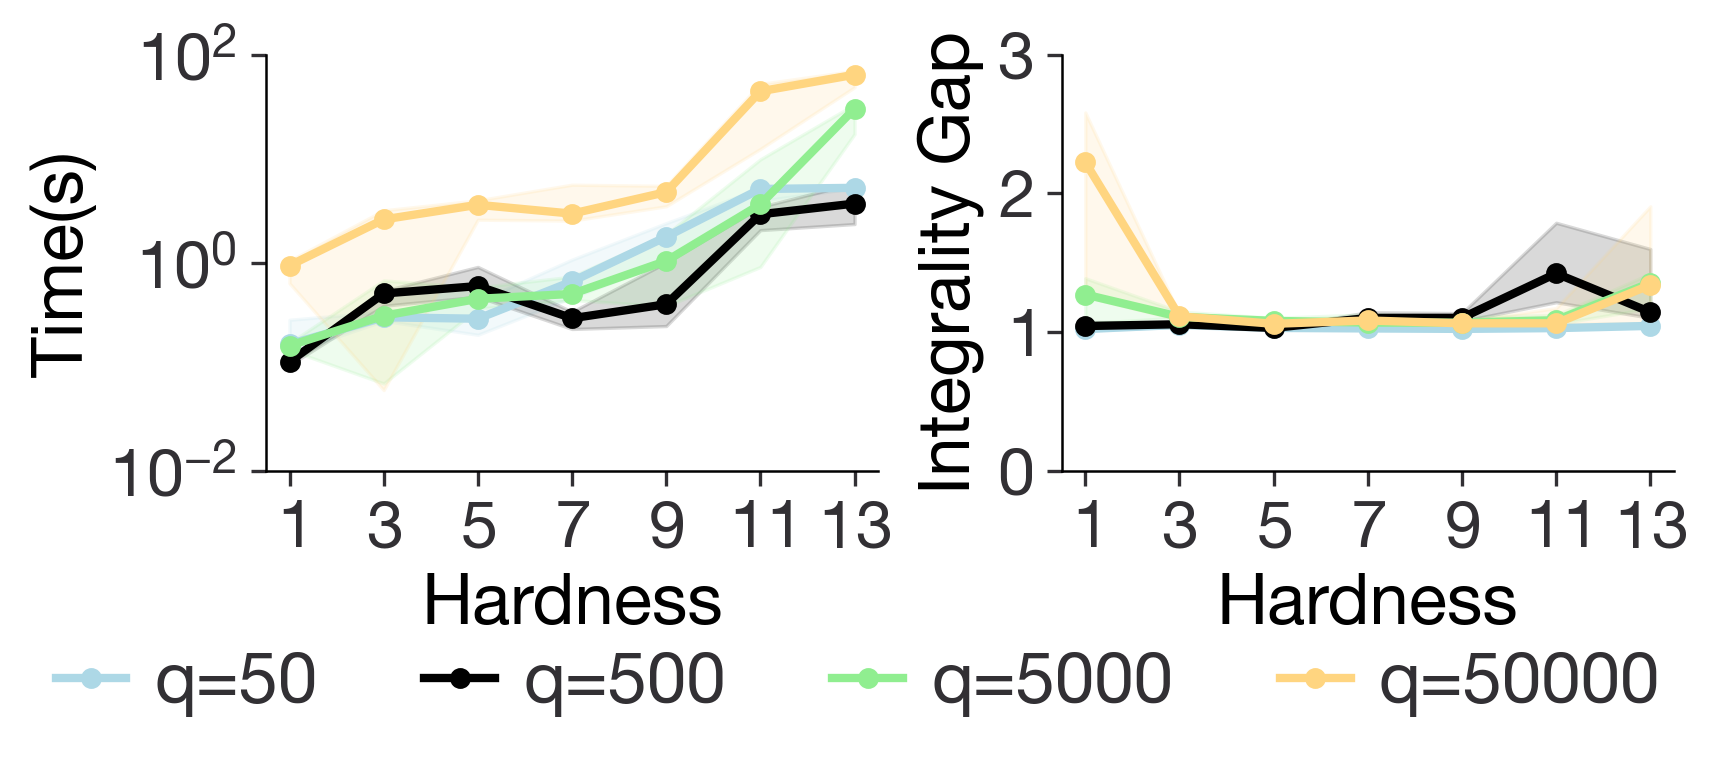

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

# Set the font family and font path globally

colorWheel = ['#ADD8E6', '#000000', '#90EE90', '#FFD580', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 1.9)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 4
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('G2.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

# Split label into dataset, Q value, and measurement type
data['dataset'] = data['label'].apply(lambda x: x.split('_')[0])
data['q'] = data['label'].apply(lambda x: x.split('_')[1][1:])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[2])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['dataset', 'q', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['dataset', 'q', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['dataset', 'q', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['dataset', 'q', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['dataset', 'q', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['dataset', 'q', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['dataset', 'q', 'measurement_type', 'hardness'])
aggregated_data.columns = ['dataset', 'q', 'measurement_type', 'hardness', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'


error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15

# solved_problems = aggregated_data[aggregated_data['measurement_type'] == 'found'].groupby(['dataset', 'q']).agg({'sum': 'sum'}).rename(columns={'sum': 'solved'})
# print(solved_problems)
# # Merge the data to have both solved and total problems in one DataFrame
# problems_data = pd.merge(solved_problems, total_problems, on=['dataset_name', 'downscale', 'alpha']).reset_index()
# problems_data['solved_ratio'] = problems_data['solved'].astype(int).astype(str) + "/" + problems_data['total'].astype(int).astype(str)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)

xticks = list(range(1, 14, 2))
dataset = ['ssds0', 'tpch0', 'ssds1', 'tpch1']
dataset_names = ['Q1 SDSS', 'Q2 TPC-H', 'Q3 SDSS', 'Q4 TPC-H']
qs = ["50", "500", "5000", "50000"]
d = 0.15
xoffset = np.arange(0, 5*d, d)*0

for i, D in enumerate(dataset[:1]):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    ax = axs[0]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['q']==q] 
        time_data = q_data.loc[q_data['measurement_type']=='time']
        ax.plot(time_data['hardness']+xoffset[j], time_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=f"q={q}")
        ax.fill_between(time_data['hardness']+xoffset[j], time_data[yneg], time_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
    ax.set_yscale('log')
#     if i == 1:
#         ticks = [1,3,5]
#         ax.set_yticks(ticks)
#         ax.set_yticklabels([str(t) for t in ticks])

#     ax.set_ylim(bottom=0.4)
    ax.set_xticks(xticks)
#     ax.set_title(f'Q{i+1} {dataset_names[i]}', fontweight='bold', loc='center')
    ax.set_xlim(0.5, 13.5)
    ax.set_xlabel('Hardness')

    axx = axs[1]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['q']==q] 
        igap_data = q_data.loc[q_data['measurement_type']=='igap']
        axx.plot(igap_data['hardness']+xoffset[j], igap_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=f"q={q}")
        axx.fill_between(igap_data['hardness']+xoffset[j], igap_data[yneg], igap_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
    if i == 0:
        ax.set_ylabel('Time(s)')    
        axx.set_ylabel('Integrality Gap')
#     axx.set_yscale('log')
    axx.set_xticks(xticks)
    if i == 3:
        axx.set_yscale('log')

#     if i == 1:
#         axx.set_ylim(0.99, 1.4)
#         ticks = [1, 1.2, 1.4]
#     else:
#         axx.set_ylim(bottom=0.9)
#         ticks = [1, 3, 5]
#     axx.set_yticks(ticks)
#     axx.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#     axx.set_yticklabels([str(t) for t in ticks])
#     axx.get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

    axx.set_xlabel('Hardness')
    axx.set_xlim(0.5, 13.5)

# Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -0.3, 0.7, 0.05])
ax_leg.axis('off')
ax_leg.legend(axs[1].get_legend_handles_labels()[0], [f"q={q}" for q in qs], loc='center', ncol=len(qs), frameon=False, handlelength=1.0, handletextpad=0.4, borderaxespad=0.2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1, wspace=0.3, hspace=0.3)

plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_1215257/2478844984.py:156: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


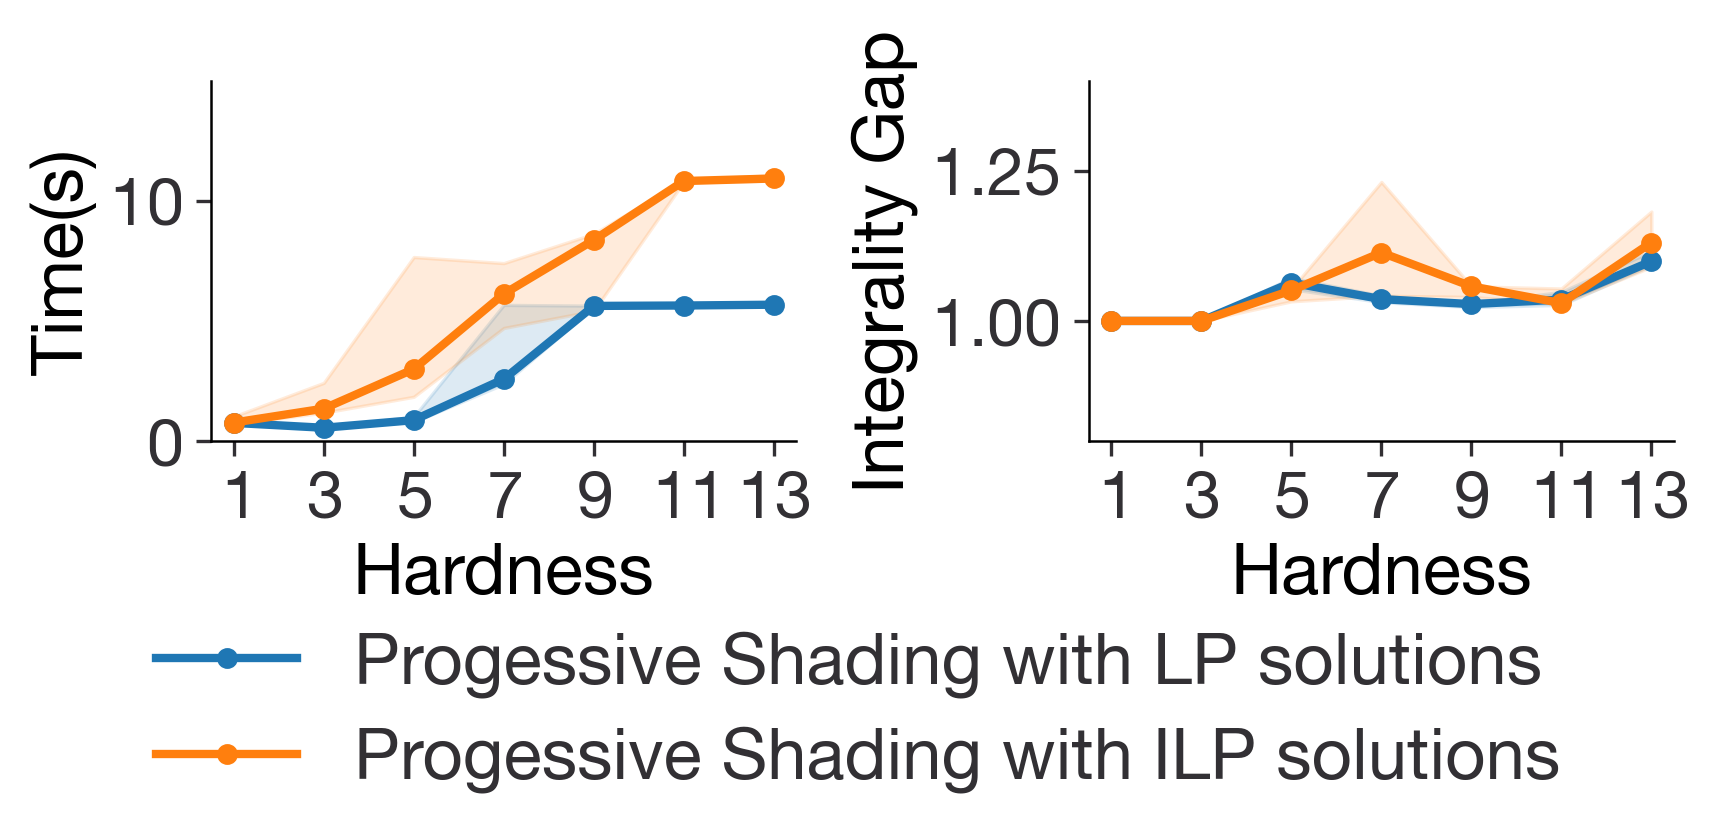

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 1.9)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 4
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('M1.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

# Split label into dataset, Q value, and measurement type
data['dataset'] = data['label'].apply(lambda x: x.split('_')[0])
data['method'] = data['label'].apply(lambda x: x.split('_')[1])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[2])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['dataset', 'method', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data.columns = ['dataset', 'method', 'measurement_type', 'hardness', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'


error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15

# solved_problems = aggregated_data[aggregated_data['measurement_type'] == 'found'].groupby(['dataset', 'q']).agg({'sum': 'sum'}).rename(columns={'sum': 'solved'})
# print(solved_problems)
# # Merge the data to have both solved and total problems in one DataFrame
# problems_data = pd.merge(solved_problems, total_problems, on=['dataset_name', 'downscale', 'alpha']).reset_index()
# problems_data['solved_ratio'] = problems_data['solved'].astype(int).astype(str) + "/" + problems_data['total'].astype(int).astype(str)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
xticks = list(range(1, 14, 2))
dataset = ['ssds0', 'tpch0', 'ssds1', 'tpch1']
dataset_names = ['Q1 SDSS', 'Q2 TPC-H', 'Q3 SDSS', 'Q4 TPC-H']
qs = ["LPLSR", "ILPLSR"]
d = 0.15
xoffset = np.arange(0, 5*d, d)*0
ylims = [(0.1, 20), (0.1, 10)]
ylimss = [(0.9, 3), (1, 1.01)]

for i, D in enumerate(dataset[:1]):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    ax = axs[0]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        time_data = q_data.loc[q_data['measurement_type']=='time']
        ax.plot(time_data['hardness']+xoffset[j], time_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        ax.fill_between(time_data['hardness']+xoffset[j], time_data[yneg], time_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region

#     ax.set_ylim(bottom=0)
    ax.set_xticks(xticks)
#     ax.set_title(dataset_names[i], loc='center')
    ax.set_xlim(0.5, 13.5)
#     ax.set_yscale('log')
    ax.set_xlabel('Hardness')

    axx = axs[1]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        igap_data = q_data.loc[q_data['measurement_type']=='igap']
        axx.plot(igap_data['hardness']+xoffset[j], igap_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        axx.fill_between(igap_data['hardness']+xoffset[j], igap_data[yneg], igap_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
#     axx.set_ylim(bottom=1)
    axx.set_xticks(xticks)
    axx.set_xlabel('Hardness')
    if i == 0:
        ax.set_ylabel('Time(s)')
        axx.set_ylabel('Integrality Gap')
    axx.set_xlim(0.5, 13.5)

# Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -0.3, 0.7, 0.05])
ax_leg.axis('off')
legends = ["Progessive Shading with LP solutions", "Progessive Shading with ILP solutions"]
ax_leg.legend(axs[1].get_legend_handles_labels()[0], [f"{legends[i]}" for i in range(len(qs))], loc='center', ncol=1, frameon=False)

# x_center_01 = (axs[0].get_position().x0 + axs[1].get_position().x1) / 2
# x_center_23 = (axs[2].get_position().x0 + axs[3].get_position().x1) / 2
# v = 0.95
# fig.text(x_center_01, v, f'Q1 {dataset_names[0]}', fontweight='bold', ha='center', va='bottom', transform=fig.transFigure)
# fig.text(x_center_23, v, f'Q2 {dataset_names[1]}', fontweight='bold', ha='center', va='bottom', transform=fig.transFigure)



plt.tight_layout()
plt.subplots_adjust(bottom=0.2, wspace=0.5, hspace=0.3)

plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_1215257/3821268584.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


For dataset: Q1 SDSS
Total solved by LSR: 35
Average igap by LSR: 1.044351
For dataset: Q1 SDSS
Total solved by RLSR: 35
Average igap by RLSR: 7.764498
For dataset: Q2 TPC-H
Total solved by LSR: 35
Average igap by LSR: 1.000943
For dataset: Q2 TPC-H
Total solved by RLSR: 35
Average igap by RLSR: 1.003454
For dataset: Q3 SDSS
Total solved by LSR: 35
Average igap by LSR: 1.010035
For dataset: Q3 SDSS
Total solved by RLSR: 33
Average igap by RLSR: 1.003330
For dataset: Q4 TPC-H
Total solved by LSR: 34
Average igap by LSR: 1.000000
For dataset: Q4 TPC-H
Total solved by RLSR: 34
Average igap by RLSR: 40902.850647


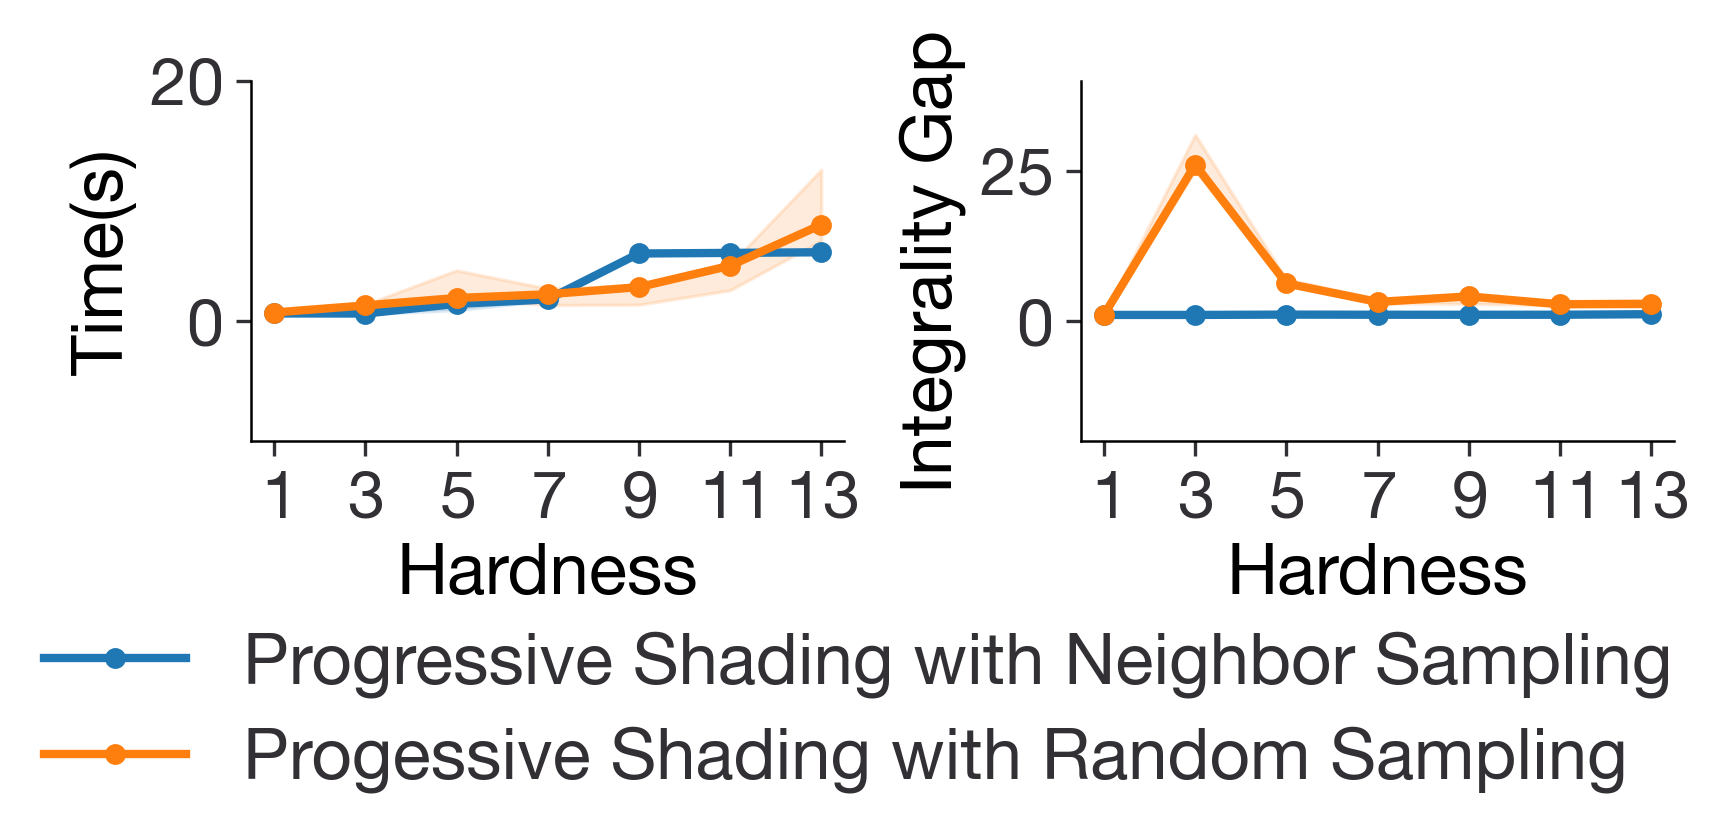

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 1.9)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 4
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('M2.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

# Split label into dataset, Q value, and measurement type
data['dataset'] = data['label'].apply(lambda x: x.split('_')[0])
data['method'] = data['label'].apply(lambda x: x.split('_')[1])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[2])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['dataset', 'method', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data.columns = ['dataset', 'method', 'measurement_type', 'hardness', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'

# solved_problems = aggregated_data[aggregated_data['measurement_type'] == 'found'].groupby(['dataset', 'q']).agg({'sum': 'sum'}).rename(columns={'sum': 'solved'})
# print(solved_problems)
# # Merge the data to have both solved and total problems in one DataFrame
# problems_data = pd.merge(solved_problems, total_problems, on=['dataset_name', 'downscale', 'alpha']).reset_index()
# problems_data['solved_ratio'] = problems_data['solved'].astype(int).astype(str) + "/" + problems_data['total'].astype(int).astype(str)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
xticks = list(range(1, 14, 2))
dataset = ['ssds0', 'tpch0', 'ssds1', 'tpch1']
dataset_names = ['Q1 SDSS', 'Q2 TPC-H', 'Q3 SDSS', 'Q4 TPC-H']
qs = ["LSR", "RLSR"]
d = 0.15
xoffset = np.arange(0, 5*d, d)*0
ylims = [(0.1, 10), (0.1, 2)]
ylimss = [(0.9, 5), (1, 1.01)]

error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15

for i, D in enumerate(dataset):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    for j, q in enumerate(qs):
        print("For dataset:", dataset_names[i])
        q_data = df_agg.loc[df_agg['method']==q]
        count = sum(q_data.loc[q_data['measurement_type']=='found']['sum'])
        print(r"Total solved by %s: %d" % (q, count))
        avg = sum(q_data.loc[q_data['measurement_type']=='igap']['sum']) / count
        print(r"Average igap by %s: %f" % (q, avg))

for i, D in enumerate(dataset[:1]):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    ax = axs[0]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        time_data = q_data.loc[q_data['measurement_type']=='time']
        ax.plot(time_data['hardness']+xoffset[j], time_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        ax.fill_between(time_data['hardness']+xoffset[j], time_data[yneg], time_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
    ax.set_xticks(xticks)
#     ax.set_title(dataset_names[i], loc='center')
    ax.set_xlim(0.5, 13.5)
#     ax.set_ylim(bottom=.1)
#     ax.set_yscale('log')
    ax.set_xlabel('Hardness')

    axx = axs[1]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        igap_data = q_data.loc[q_data['measurement_type']=='igap']
        axx.plot(igap_data['hardness']+xoffset[j], igap_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        axx.fill_between(igap_data['hardness']+xoffset[j], igap_data[yneg], igap_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
#     axx.set_ylim(bottom=1)
    axx.set_xticks(xticks)
    axx.set_xlabel('Hardness')
    if i == 0:
        ax.set_ylabel('Time(s)')
        axx.set_ylabel('Integrality Gap')
    axx.set_xlim(0.5, 13.5)
    if i == 3:
        axx.set_yscale('log')

# Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -0.3, 0.7, 0.05])
ax_leg.axis('off')

legends = ["Progressive Shading with Neighbor Sampling", "Progessive Shading with Random Sampling"]

ax_leg.legend(axs[1].get_legend_handles_labels()[0], [f"{legends[i]}" for i in range(len(qs))], loc='center', ncol=1,frameon=False)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, wspace=0.4, hspace=0.5)

plt.show()

Average speed up:  4.789943803851395
Parallelization efficiency:  0.8012448440347328


/tmp/ipykernel_3459623/3373296163.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


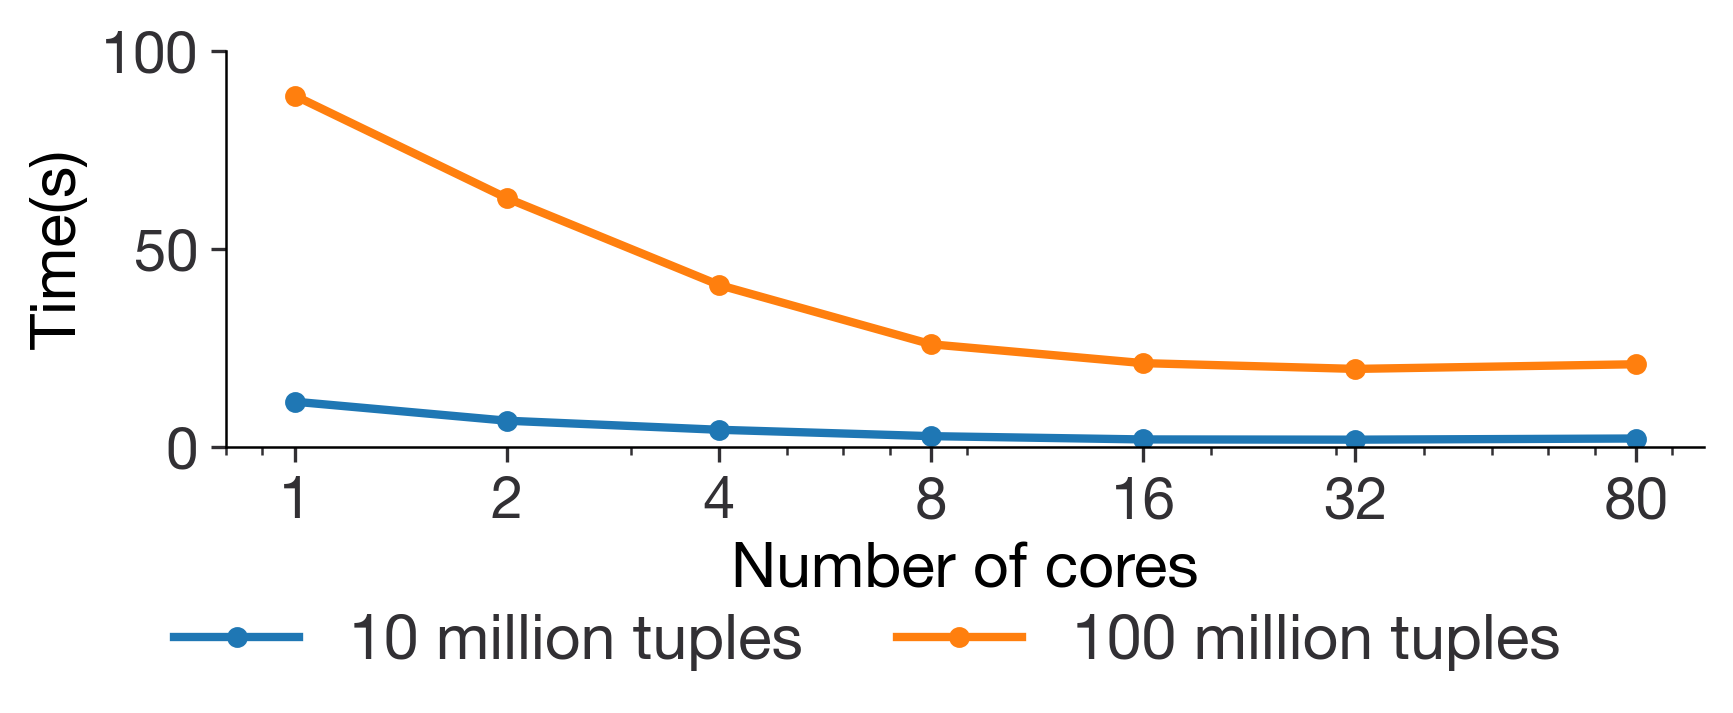

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 2)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 2
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('M3.csv', header=None)
data.columns = ["label", "core", "time"]

data['method'] = data['label'].apply(lambda x: x.split('_')[1])

# Filter for 'time' and 'igap' measurement types
data['time'] /= 1000
qs = ["o7", "o8"]

one = data[data['core']==1.0]['time']
ety = data[data['core']==80.0]['time']
rat = np.mean(np.array(one)/np.array(ety))
print("Average speed up: ", rat)
print("Parallelization efficiency: ", (1-1/rat)/(1-1/80))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
xticks = [1,2,4,8,16,32,80]
ylims = [(0.1, 10), (0.1, 2)]

labels = ["10 million tuples", "100 million tuples"]

for i, q in enumerate(qs): 
    ax.plot(
        data.loc[data['method']==q,'core'],
        data.loc[data['method']==q,'time'],
        color = colorWheel[i],
        linestyle=linestyle,
        lw=lw,
        marker=marker,
        markersize=markersize,
        markeredgecolor=colorWheel[i],
        label = labels[i]
    )
ax.set_xlim(0, 80.5)
ax.set_ylim(bottom=0)
ax.set_xticks(xticks)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Time(s)')
ax.set_xscale('log')
ax.set_xlim(0.8,100)
ticks = [1, 2,4,8,16,32,80]
ax.set_xticks(ticks)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticklabels([str(t) for t in ticks])
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())

# Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -0.15, 0.7, 0.05])
ax_leg.axis('off')

ax_leg.legend(axs[0].get_legend_handles_labels()[0], [f"{labels[i]}" for i in range(len(qs))], loc='center', ncol=len(qs), frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_1215257/2080386716.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


For ssds0
Total solved by DR: 35
Average igap by DR: 1.029518
Total solved by RDR: 28
Average igap by RDR: 1.509614
For tpch0
Total solved by DR: 35
Average igap by DR: 1.000528
Total solved by RDR: 35
Average igap by RDR: 1.001514
For ssds1
Total solved by DR: 35
Average igap by DR: 1.000787
Total solved by RDR: 35
Average igap by RDR: 1.002084
For tpch1
Total solved by DR: 35
Average igap by DR: 557.747342
Total solved by RDR: 30
Average igap by RDR: 1.000000


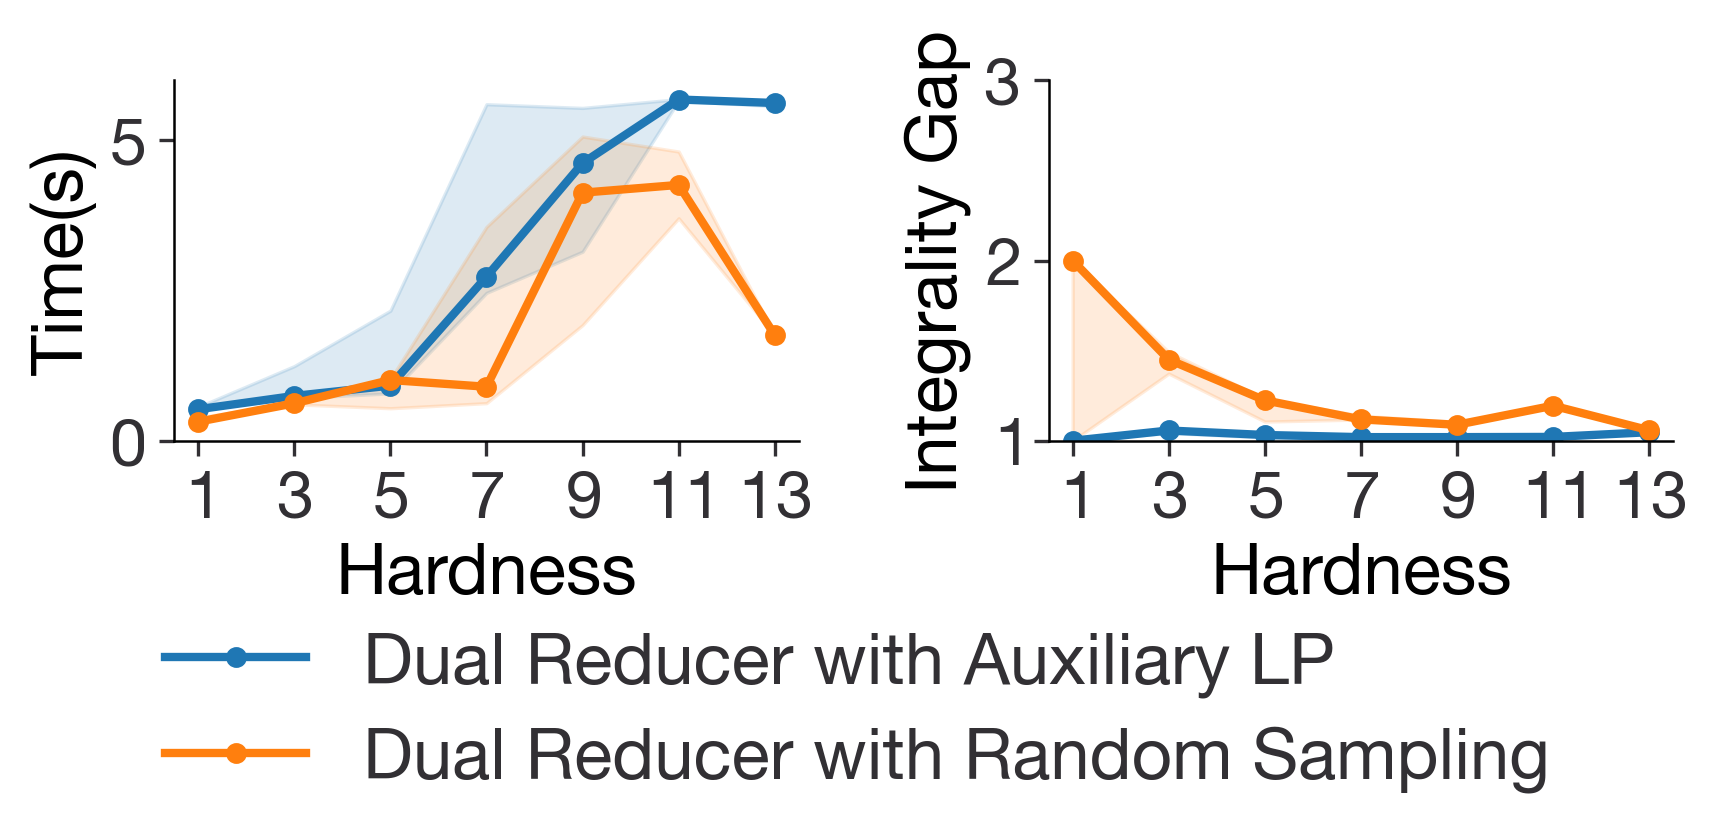

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 1.9)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 4
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('M4.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

# Split label into dataset, Q value, and measurement type
data['dataset'] = data['label'].apply(lambda x: x.split('_')[0])
data['method'] = data['label'].apply(lambda x: x.split('_')[1])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[2])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['dataset', 'method', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data.columns = ['dataset', 'method', 'measurement_type', 'hardness', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'

# solved_problems = aggregated_data[aggregated_data['measurement_type'] == 'found'].groupby(['dataset', 'q']).agg({'sum': 'sum'}).rename(columns={'sum': 'solved'})
# print(solved_problems)
# # Merge the data to have both solved and total problems in one DataFrame
# problems_data = pd.merge(solved_problems, total_problems, on=['dataset_name', 'downscale', 'alpha']).reset_index()
# problems_data['solved_ratio'] = problems_data['solved'].astype(int).astype(str) + "/" + problems_data['total'].astype(int).astype(str)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
xticks = list(range(1, 14, 2))
dataset = ['ssds0', 'tpch0', 'ssds1', 'tpch1']
dataset_names = ['Q1 SDSS', 'Q2 TPC-H', 'Q3 SDSS', 'Q4 TPC-H']
qs = ["DR", "RDR"]
d = 0.15
xoffset = np.arange(0, 5*d, d)*0
ylims = [(0.1, 8), (0.1, 2)]
ylimss = [(0.9, 4), (1, 1.005)]

error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15

for i, D in enumerate(dataset):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    print("For", D)
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q]
        count = sum(q_data.loc[q_data['measurement_type']=='found']['sum'])
        print(r"Total solved by %s: %d" % (q, count))
        avg = sum(q_data.loc[q_data['measurement_type']=='igap']['sum']) / count
        print(r"Average igap by %s: %f" % (q, avg))

for i, D in enumerate(dataset[:1]):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    ax = axs[0]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        time_data = q_data.loc[q_data['measurement_type']=='time']
        ax.plot(time_data['hardness']+xoffset[j], time_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        ax.fill_between(time_data['hardness']+xoffset[j], time_data[yneg], time_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region

#     ax.set_ylim(bottom=0)
    ax.set_xticks(xticks)
#     ax.set_title(dataset_names[i], loc='center')
    ax.set_xlim(0.5, 13.5)
    ax.set_xlabel('Hardness')

#     if i != 3:
#         ax.set_yscale('log')
    axx = axs[1]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        igap_data = q_data.loc[q_data['measurement_type']=='igap']
        axx.plot(igap_data['hardness']+xoffset[j], igap_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        axx.fill_between(igap_data['hardness']+xoffset[j], igap_data[yneg], igap_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
    axx.set_ylim(bottom=1)
    axx.set_xticks(xticks)
    axx.set_xlabel('Hardness')
    if i == 0:
        ax.set_ylabel('Time(s)')
        axx.set_ylabel('Integrality Gap')
    axx.set_xlim(0.5, 13.5)
    if i == 3:
        axx.set_yscale('log')

# Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -.3, 0.7, 0.05])
ax_leg.axis('off')

legends = ["Dual Reducer with Auxiliary LP", "Dual Reducer with Random Sampling"]

ax_leg.legend(axs[1].get_legend_handles_labels()[0], [f"{legends[i]}" for i in range(len(qs))], loc='center', ncol=1, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2, wspace=0.4, hspace=0.5)

plt.show()

In [105]:
with open("M5.csv", 'r') as file:
    vals = []
    for line in file:
        vals.append(int(float(line.split(',')[-1])/1000))
print(f"KD-Tree partitions a relation with 100 million tuples in {vals[0]}s")
print(f"DLV partitions a relation with 100 million tuples in {vals[1]}s")
print(f"DLV partitions a relation with 1 billion tuples in {vals[2]}s")

KD-Tree partitions a relation with 100 million tuples in 300s
DLV partitions a relation with 100 million tuples in 138s
DLV partitions a relation with 1 billion tuples in 1827s


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_1215257/2624216324.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


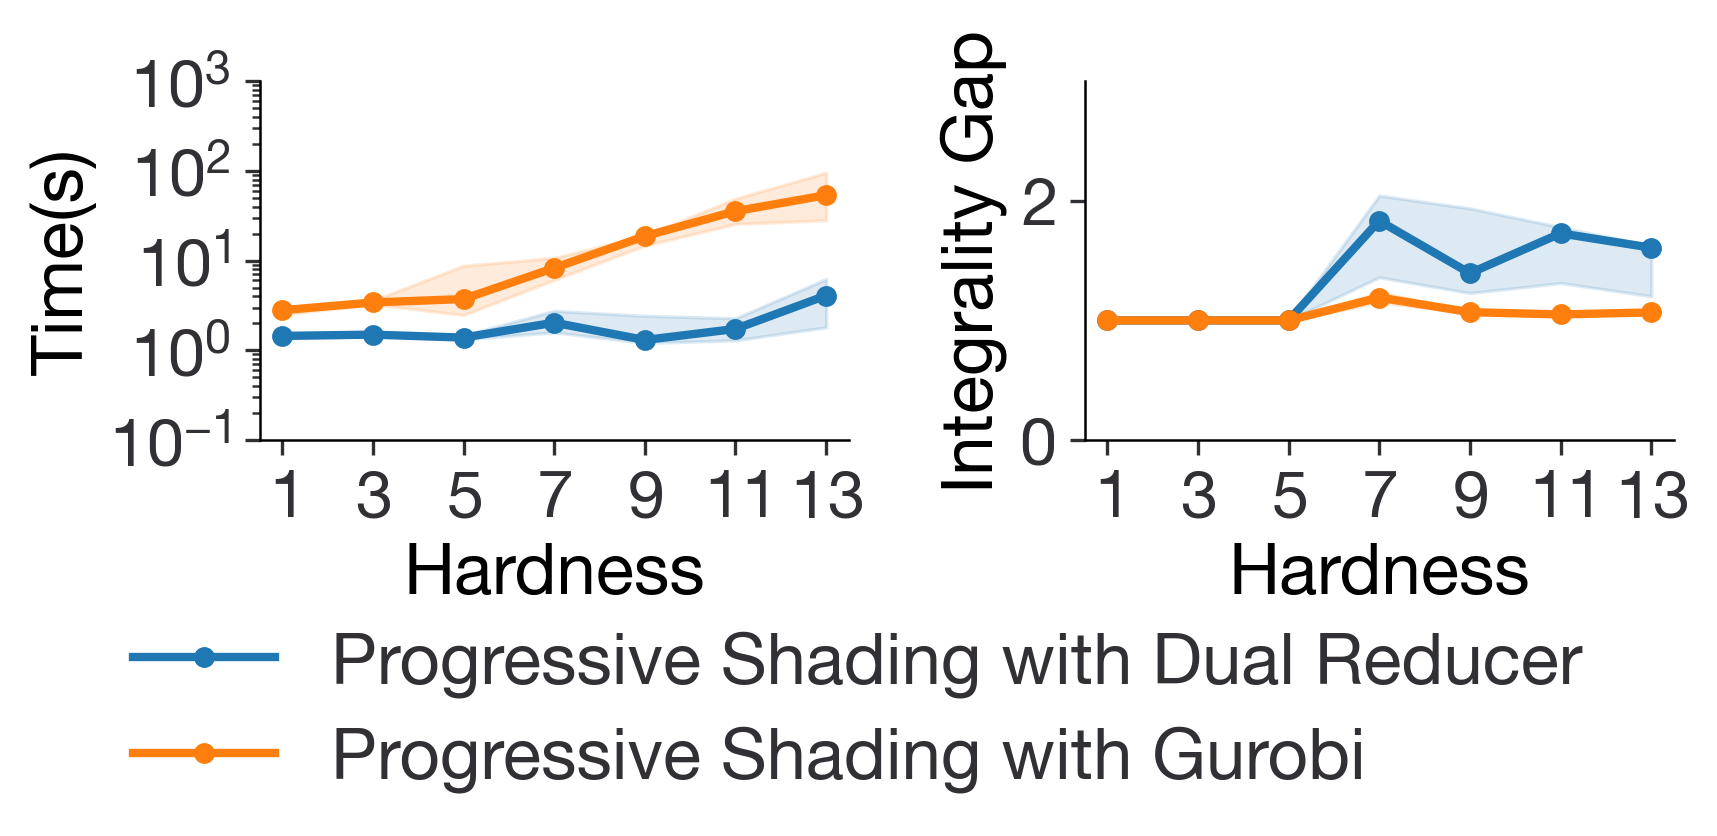

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 1.9)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 4
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('M6.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

# Split label into dataset, Q value, and measurement type
data['dataset'] = data['label'].apply(lambda x: x.split('_')[0])
data['method'] = data['label'].apply(lambda x: x.split('_')[1])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[2])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['dataset', 'method', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data.columns = ['dataset', 'method', 'measurement_type', 'hardness', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'

# solved_problems = aggregated_data[aggregated_data['measurement_type'] == 'found'].groupby(['dataset', 'q']).agg({'sum': 'sum'}).rename(columns={'sum': 'solved'})
# print(solved_problems)
# # Merge the data to have both solved and total problems in one DataFrame
# problems_data = pd.merge(solved_problems, total_problems, on=['dataset_name', 'downscale', 'alpha']).reset_index()
# problems_data['solved_ratio'] = problems_data['solved'].astype(int).astype(str) + "/" + problems_data['total'].astype(int).astype(str)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
xticks = list(range(1, 14, 2))
dataset = ['ssds0', 'tpch0', 'ssds1', 'tpch1']
dataset_names = ['Q1 SDSS', 'Q2 TPC-H', 'Q3 SDSS', 'Q4 TPC-H']
qs = ["LSR", "GDRLSR"]
d = 0.15
xoffset = np.arange(0, 5*d, d)*0
ylims = [(0.1, 300), (0.1, 100)]
ylimss = [(0.9, 2), (1, 1.002)]

error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15

for i, D in enumerate(dataset[:1]):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    ax = axs[0]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        time_data = q_data.loc[q_data['measurement_type']=='time']
        ax.plot(time_data['hardness']+xoffset[j], time_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        ax.fill_between(time_data['hardness']+xoffset[j], time_data[yneg], time_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region

    ax.set_yscale('log')
#     ax.set_ylim(bottom=1)
    ax.set_xticks(xticks)
#     ax.set_title(dataset_names[i], loc='center')
    ax.set_xlim(0.5, 13.5)
    ax.set_xlabel('Hardness')

    axx = axs[1]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        igap_data = q_data.loc[q_data['measurement_type']=='igap']
        axx.plot(igap_data['hardness']+xoffset[j], igap_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        axx.fill_between(igap_data['hardness']+xoffset[j], igap_data[yneg], igap_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
#     axx.set_ylim(bottom=1)
    axx.set_xticks(xticks)
    axx.set_xlabel('Hardness')
    if i == 0:
        ax.set_ylabel('Time(s)')
        axx.set_ylabel('Integrality Gap')
    axx.set_xlim(0.5, 13.5)
#     if i == 0:
#         axx.set_ylim(1, 3)

# Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -.3, 0.7, 0.05])
ax_leg.axis('off')
# x_center_01 = (axs[0].get_position().x0 + axs[1].get_position().x1) / 2
# x_center_23 = (axs[2].get_position().x0 + axs[3].get_position().x1) / 2
# v = 0.95
# fig.text(x_center_01, v, f'Q1 {dataset_names[0]}', fontweight='bold', ha='center', va='bottom', transform=fig.transFigure)
# fig.text(x_center_23, v, f'Q2 {dataset_names[1]}', fontweight='bold', ha='center', va='bottom', transform=fig.transFigure)


legends = ["Progressive Shading with Dual Reducer", "Progressive Shading with Gurobi"]

ax_leg.legend(axs[1].get_legend_handles_labels()[0], [f"{legends[i]}" for i in range(len(qs))], loc='center', ncol=1, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2, wspace=0.4, hspace=0.3)

plt.show()

In [123]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib
# from matplotlib.ticker import *
# import matplotlib.font_manager
# from pathlib import Path
# plt.style.use('plot_styles.txt')
# import  matplotlib.font_manager
# fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

# colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

# curve_names = {
#     'D': 'Parallel Dual Simplex',
#     'DR': 'Dual Reducer',
#     'GDR': 'Gurobi ILP',
#     'SR': 'SketchRefine',
#     'LSR': 'Progressive Shading',
#     'DLV': 'Dynamic Low Variance'
# }

# lw=2
# markersize=4
# capsize=2
# marker='o'
# linestyle='-'
# capsize=4
# capthick=0.8
# elinewidth=0.5
# alpha=0.15
# figsize=(12, 6)

# plt.rcParams["font.family"] = "Helvetica Neue"

# indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
# xOffsetMap = [0.8, 1.4, 1]

# d = 6
# SMALL_SIZE = 12+d
# MEDIUM_SIZE = 13+d
# BIGGER_SIZE = 16+d

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# #markers = ['o', 'P', 'd', 'v', '^']

# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the data
# data = pd.read_csv('M7.csv', header=None)
# data.columns = ["label", "core", "time"]

# data['method'] = data['label'].apply(lambda x: x.split('_')[0])
# data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[1])

# # Filter for 'time' and 'igap' measurement types
# data['time'] /= 1000
# qs = ["o8", "o9"]

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
# xticks = [1,2,4,8,16,32,80]
# ylims = [(0.1, 10), (0.1, 2)]

# labels = ["100 million tuples", "1 billion tuples"]

# for i, q in enumerate(qs): 
#     ax.plot(
#         data.loc[data['method']==q,'core'],
#         data.loc[data['method']==q,'time'],
#         color = colorWheel[i],
#         linestyle=linestyle,
#         lw=lw,
#         marker=marker,
#         markersize=markersize,
#         markeredgecolor=colorWheel[i],
#         label = labels[i]
#     )
# ax.set_xlim(0, 80.1)
# ax.set_ylim(bottom=0)
# ax.set_xticks(xticks)
# ax.set_xlabel('Number of cores')
# ax.set_ylabel('Time(s)')

# # Create a separate axis for the legend at the bottom
# ax_leg = fig.add_axes([0.15, 0.05, 0.7, 0.05])
# ax_leg.axis('off')

# ax_leg.legend(axs[0].get_legend_handles_labels()[0], [f"{labels[i]}" for i in range(len(qs))], loc='center', ncol=len(qs), frameon=False)

# plt.tight_layout()
# plt.subplots_adjust(bottom=0.2)

# plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_1215257/1225489128.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


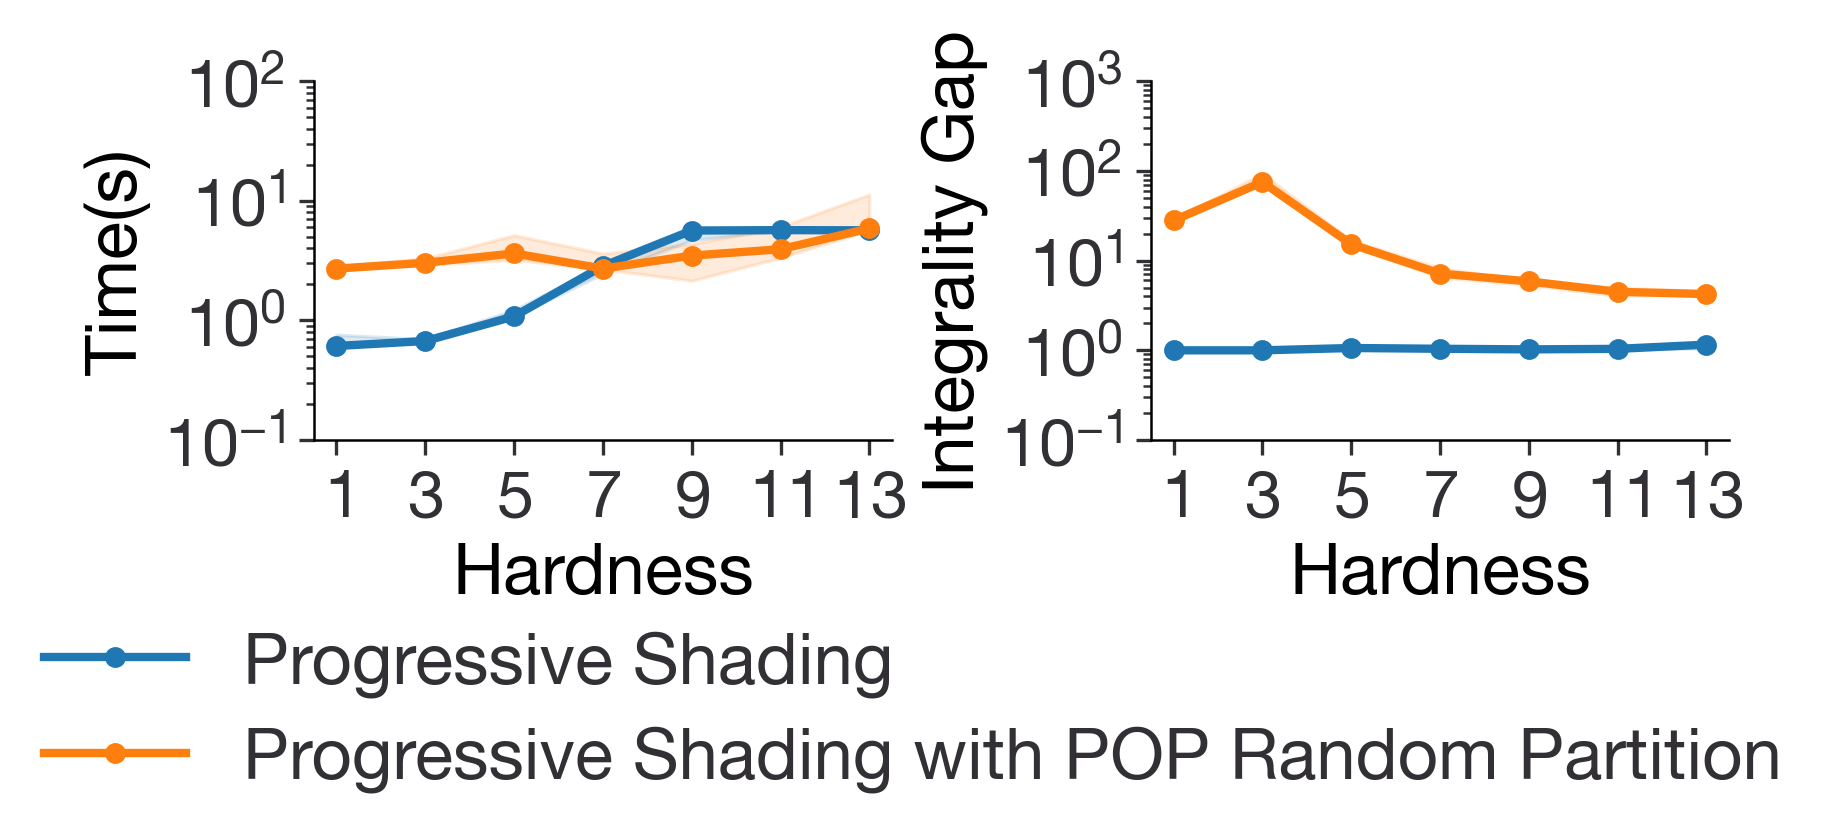

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
import matplotlib.font_manager
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 1.9)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 4
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('M8.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

# Split label into dataset, Q value, and measurement type
data['dataset'] = data['label'].apply(lambda x: x.split('_')[0])
data['method'] = data['label'].apply(lambda x: x.split('_')[1])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[2])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['dataset', 'method', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['dataset', 'method', 'measurement_type', 'hardness'])
aggregated_data.columns = ['dataset', 'method', 'measurement_type', 'hardness', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'

error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15

# solved_problems = aggregated_data[aggregated_data['measurement_type'] == 'found'].groupby(['dataset', 'q']).agg({'sum': 'sum'}).rename(columns={'sum': 'solved'})
# print(solved_problems)
# # Merge the data to have both solved and total problems in one DataFrame
# problems_data = pd.merge(solved_problems, total_problems, on=['dataset_name', 'downscale', 'alpha']).reset_index()
# problems_data['solved_ratio'] = problems_data['solved'].astype(int).astype(str) + "/" + problems_data['total'].astype(int).astype(str)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
xticks = list(range(1, 14, 2))
dataset = ['ssds0', 'tpch0', 'ssds1', 'tpch1']
dataset_names = ['Q1 SDSS', 'Q2 TPC-H', 'Q3 SDSS', 'Q4 TPC-H']
qs = ["LSR", "POPLSR"]
d = 0.15
xoffset = np.arange(0, 5*d, d)*0
ylims = [(0.1, 300), (0.1, 100)]
ylimss = [(0.9, 2), (1, 1.002)]

for i, D in enumerate(dataset[:1]):
    df_agg = aggregated_data[aggregated_data['dataset']==D]
    ax = axs[0]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        time_data = q_data.loc[q_data['measurement_type']=='time']
        ax.plot(time_data['hardness']+xoffset[j], time_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        ax.fill_between(time_data['hardness']+xoffset[j], time_data[yneg], time_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
    ax.set_yscale('log')
#     if i == 0:
#         ax.set_ylim(0.5, 100)
#     else:
#         ax.set_ylim(0.5, 10)
    ax.set_xticks(xticks)
#     ax.set_title(dataset_names[i], loc='center')
    ax.set_xlim(0.5, 13.5)
    ax.set_xlabel('Hardness')

    axx = axs[1]
    for j, q in enumerate(qs):
        q_data = df_agg.loc[df_agg['method']==q] 
        igap_data = q_data.loc[q_data['measurement_type']=='igap']
        axx.plot(igap_data['hardness']+xoffset[j], igap_data[mid], color=colorWheel[j], linestyle=linestyle, linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[j], label=str(j))
        axx.fill_between(igap_data['hardness']+xoffset[j], igap_data[yneg], igap_data[ypos], color=colorWheel[j], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
    if i == 0 or i == 3:
        axx.set_yscale('log')
    axx.set_xticks(xticks)
    axx.set_xlabel('Hardness')
    if i == 0:
        ax.set_ylabel('Time(s)')
        axx.set_ylabel('Integrality Gap')
    axx.set_xlim(0.5, 13.5)

# Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -.3, 0.7, 0.05])
ax_leg.axis('off')
legends = ["Progressive Shading", "Progressive Shading with POP Random Partition"]

ax_leg.legend(axs[1].get_legend_handles_labels()[0], [f"{legends[i]}" for i in range(len(qs))], loc='center', ncol=1, frameon=False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2, wspace=0.45, hspace=0.3)

plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_3459623/3713548357.py:260: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


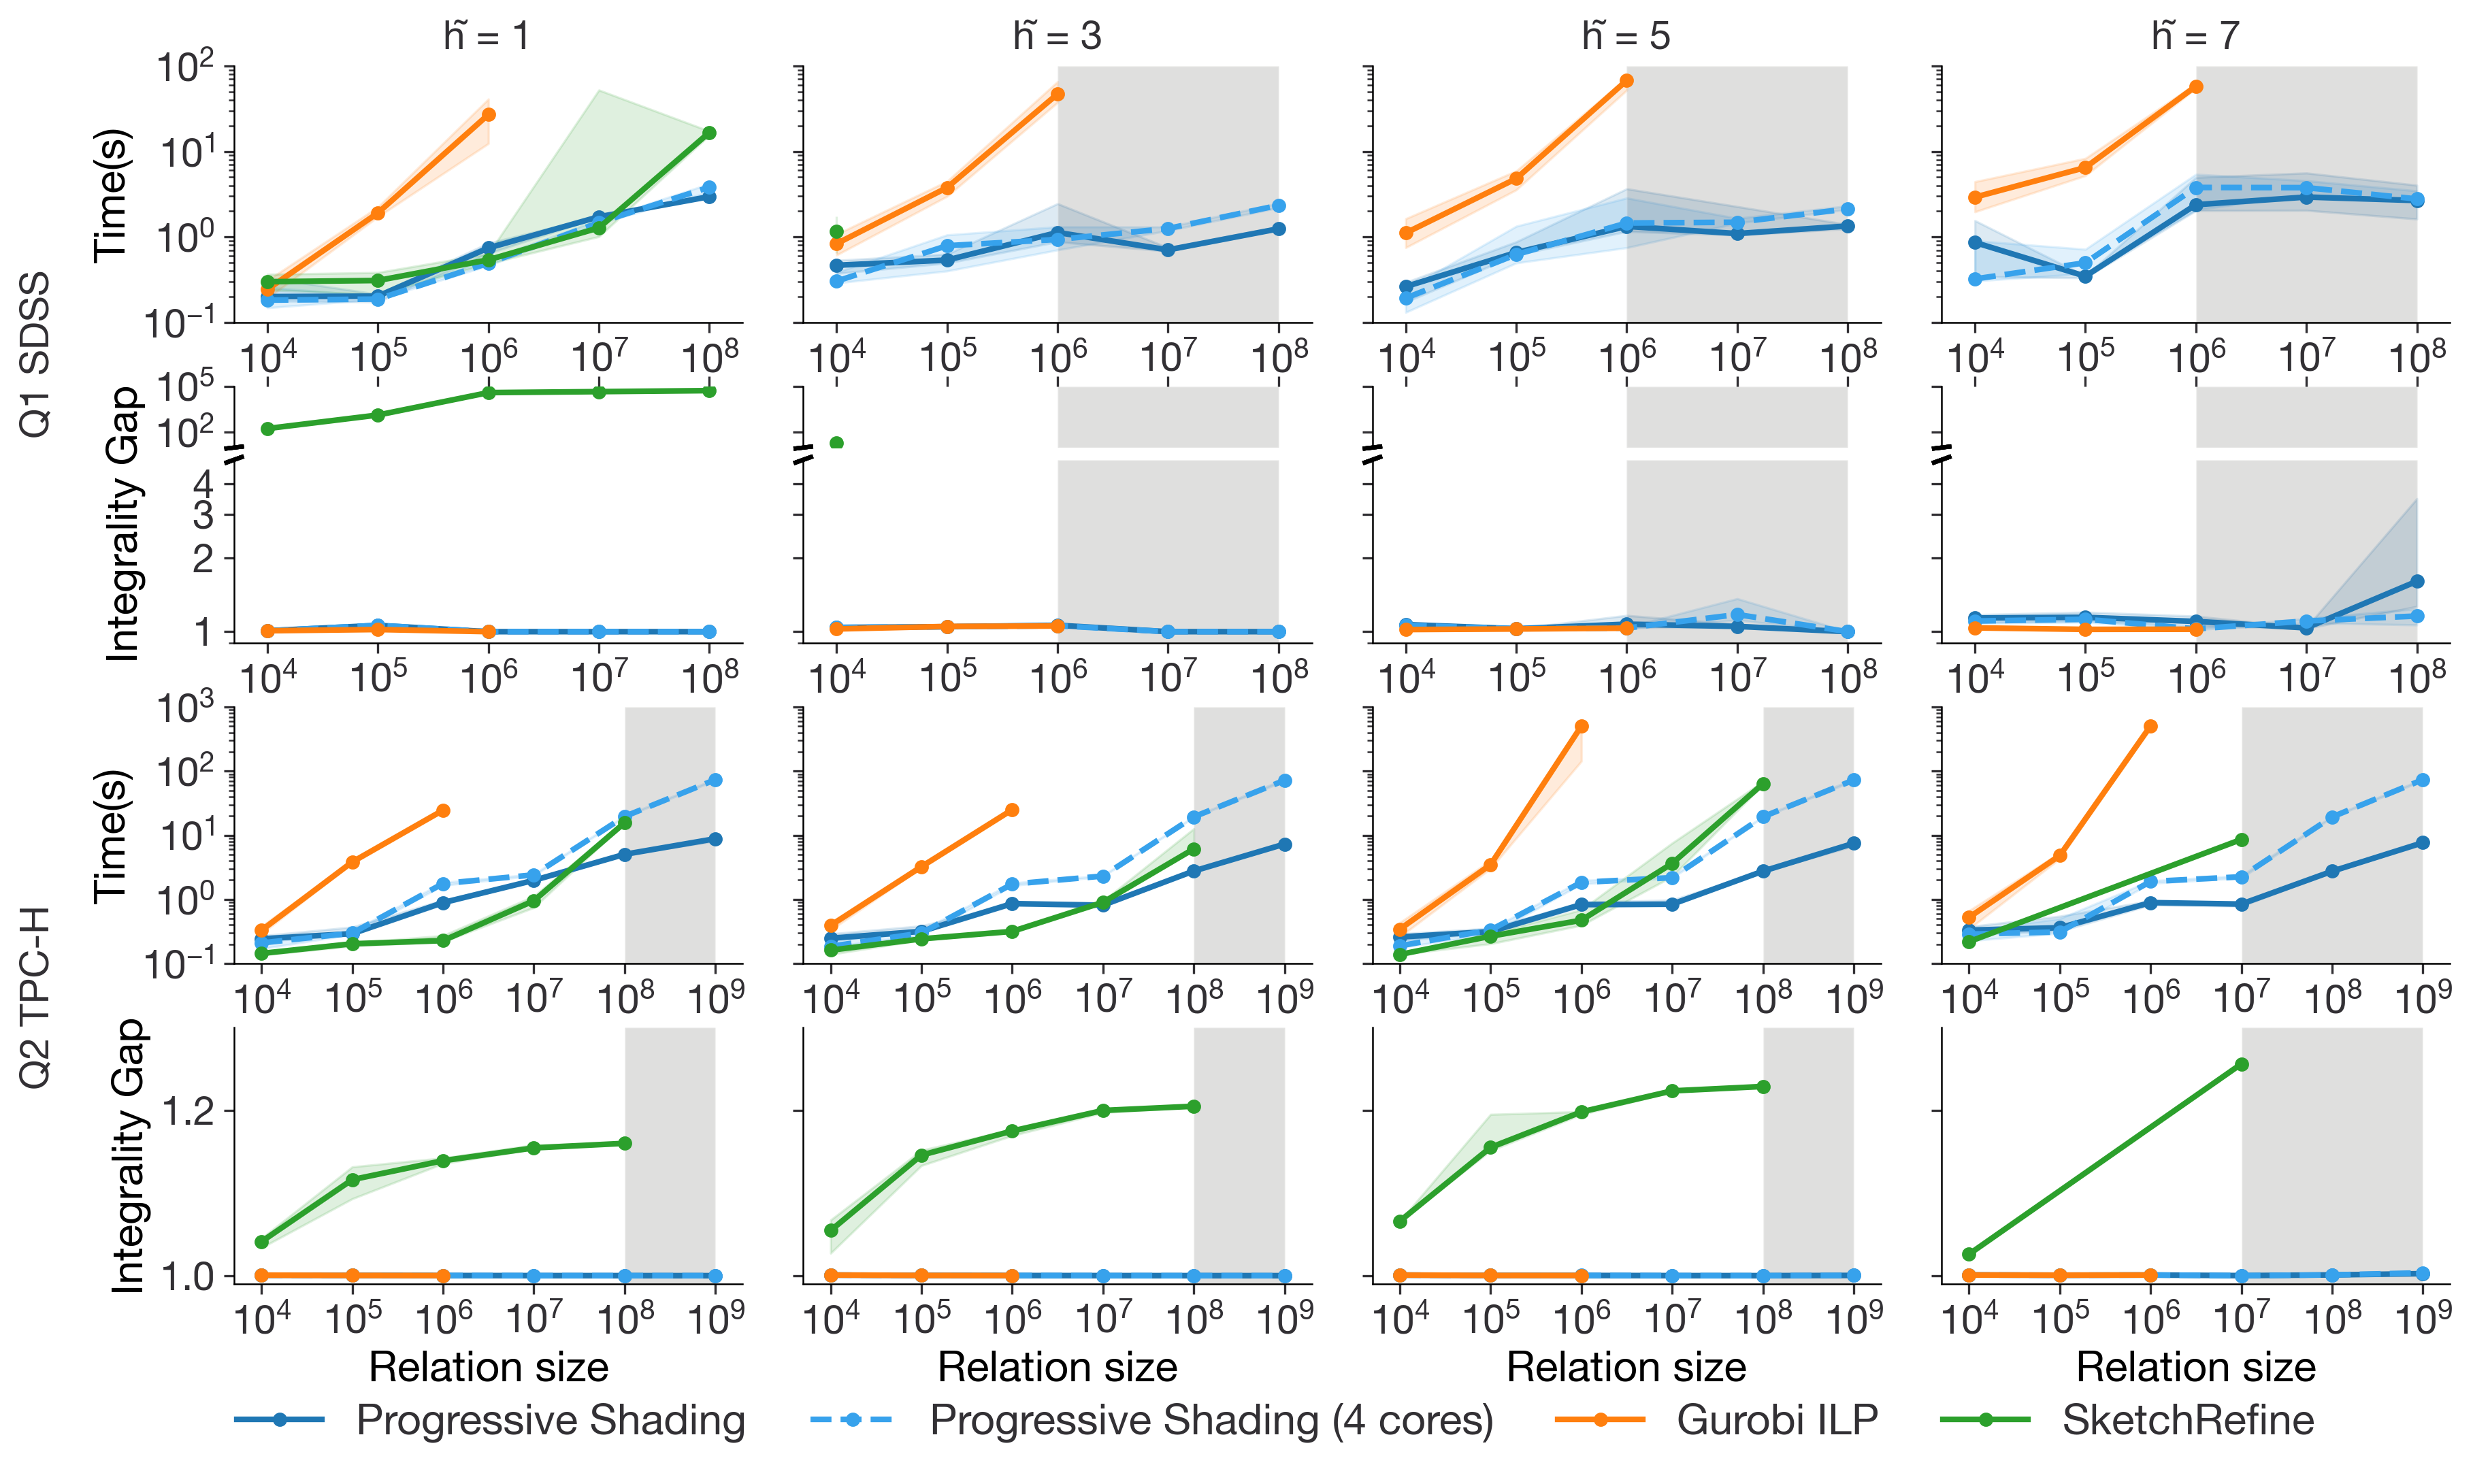

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
import matplotlib.ticker as ticker
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#37a2ec', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance',
    'LSR4': 'Progressive Shading (4 cores)'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyles=['-','--','-','-']
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(12, 8)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
# xOffsetMap = [0.8, 1.2, 1, 1.6]
xOffsetMap = [1, 1, 1, 1]
d = 2
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('E1.csv', header=None)
data.columns = ["label", "size", "measurement_value"]

queries = {'ssds0':1, 'tpch0':2, 'ssds1':3, 'tpch1':4}
dataset_names = ['SDSS', 'TPC-H']
# Split label into dataset, Q value, and measurement type
data['query'] = data['label'].apply(lambda x: int(queries[x.split('_')[0]]))
data['hardness'] = data['label'].apply(lambda x: int(x.split('_')[1][1]))
data['method'] = data['label'].apply(lambda x: x.split('_')[2])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[3])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# print(filtered_data[(filtered_data['size']==100000000) & (filtered_data['measurement_type']=='igap') & (filtered_data['hardness']==5) & ((filtered_data['method']=='LSR') | (filtered_data['method']=='LSR4'))])

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['query', 'method', 'measurement_type', 'hardness', 'size'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data.columns = ['query', 'method', 'measurement_type', 'hardness', 'size', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'

# fig, axs = plt.subplots(nrows=4, ncols=4, figsize=figsize)
fig = plt.figure(figsize=figsize)
gs_main = GridSpec(4, 4, fig)
axs = [[None for i in range(4)] for j in range(4)]

xticks = [[10**i for i in range(4,9)], [10**i for i in range(4,10)]]
methods = ["LSR", "LSR4", "GDR", "SR"]
qs = [1, 2]
error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15
broken = [True, False, False, True]
broken_lims = [((10, 10**5), (0.9, 5)), None, None, ((10**6, 10**8), (0.9, 10**4))]
time_ylims = [(0.1, 100), (0.1, 1000), (0.1, 10**2.5), (0.1, 100)]
d = 0.15
hs = [1,3,5,7]
xoffset = [0.001*x-10 for x in xticks[1]]
min_scale = 0.5
max_scale = 2
for qi, q in enumerate(qs):
    q_data = aggregated_data[aggregated_data['query']==q]
    for hi, h in enumerate(hs):
        max_other = 0
        h_data = q_data[q_data['hardness']==h]
        ax = fig.add_subplot(gs_main[qi*2, hi])
        axs[qi*2][hi] = ax
        for i, method in enumerate(methods):
            time_data = h_data[(h_data['measurement_type']=='time') & (h_data['method']==method)]
            ax.plot(time_data['size']*xOffsetMap[i], time_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
            ax.fill_between(time_data['size']*xOffsetMap[i], time_data[yneg], time_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
            ax.set_xscale('log')
            ax.set_xticks(xticks[qi])
            ax.set_yscale('log')
            ax.set_ylim(time_ylims[q-1][0], time_ylims[q-1][1])
            ax.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
            
            if method == 'LSR' or method == 'LSR4':
                max_lsr = time_data['size'].max()
            else:
                if not np.isnan(time_data['size'].max()):
                    max_other = max(time_data['size'].max(), max_other)
            if hi > 0:
                ax.set_yticklabels([])
        ax.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)

        if broken[q-1]:
            gs_nested = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[qi*2+1, hi], hspace=0.1, height_ratios=[1, 3])
            ax1 = fig.add_subplot(gs_nested[0])
            ax2 = fig.add_subplot(gs_nested[1])
            axs[qi*2+1][hi] = [ax1, ax2]
            for i, method in enumerate(methods):
                igap_data = h_data[(h_data['measurement_type']=='igap') & (h_data['method']==method)]
                ax1.plot(igap_data['size']*xOffsetMap[i], igap_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
                ax1.fill_between(igap_data['size']*xOffsetMap[i], igap_data[yneg], igap_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
                ax2.plot(igap_data['size']*xOffsetMap[i], igap_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
                ax2.fill_between(igap_data['size']*xOffsetMap[i], igap_data[yneg], igap_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
                ax1.set_ylim(*broken_lims[q-1][0])  # outliers only
                ax2.set_ylim(*broken_lims[q-1][1])
                ax1.spines['bottom'].set_visible(False)
                ax2.spines['top'].set_visible(False)
                ax1.xaxis.tick_top()
                ax1.tick_params(labeltop=False)  # don't put tick labels at the top
                ax2.xaxis.tick_bottom()
                d = .015  # how big to make the diagonal lines in axes coordinates
                # arguments to pass to plot, just so we don't keep repeating them
                kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=1.5)
                ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
                kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
                ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
                ax1.set_xscale('log')
                ax1.set_xticks(xticks[qi])
                ax2.set_xscale('log')
                ax2.set_xticks(xticks[qi])
                ax1.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
                ax2.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
                if q == 1:
                    ax1.set_yscale('log')
                    ax1.set_yticks([1e2,1e5])
                    ax2.set_yscale('log')
                    ticks = [1, 2, 3, 4]
                    ax2.set_yticks(ticks)
                    ax2.set_yticklabels([str(t) for t in ticks])
                elif q == 4:
                    ax1.set_yscale('log')
                    ax1.set_yticks([1e7])
                    ax2.set_yscale('log')
                    ax2.set_yticks([1e0, 1e2, 1e4])
                    from matplotlib.ticker import LogLocator, LogFormatter
                    # Setting minor ticks using LogLocator
                    minor_locator = LogLocator(subs=np.arange(2, 10)*.1, numticks=12)
                    ax2.yaxis.set_minor_locator(minor_locator)
                    # Formatting the minor ticks
                    minor_formatter = LogFormatter(labelOnlyBase=False)
                    ax2.yaxis.set_minor_formatter(minor_formatter)
                if hi > 0:
                    ax1.set_yticklabels([])
                    ax2.set_yticklabels([])
            ax1.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)
            ax2.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)
        else:
            axx = fig.add_subplot(gs_main[qi*2+1, hi])
            axs[qi*2+1][hi] = [axx]
            for i, method in enumerate(methods):
                igap_data = h_data[(h_data['measurement_type']=='igap') & (h_data['method']==method)]
                axx.plot(igap_data['size']*xOffsetMap[i], igap_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
                axx.fill_between(igap_data['size']*xOffsetMap[i], igap_data[yneg], igap_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
                axx.set_xscale('log')
                axx.set_xticks(xticks[qi])
                if q == 1:
                    axx.set_ylim(0.9, 10**5)
                    axx.set_yscale('log')
                    axx.set_yticks([1,1e2,1e4,1e6])
                elif q == 2:
                    axx.set_ylim(0.99, 1.3)
                elif q == 3:
                    axx.set_ylim(0.99, 1.5)
                elif q == 4:
                    axx.set_ylim(0.9, 10**8)
                    axx.set_yscale('log')
                    axx.set_yticks([1,1e2,1e4,1e6])
                if hi > 0:
                    axx.set_yticklabels([])
                axx.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
            axx.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)

xmove = 0.5
ymove = -1.25
axs[0][0].set_ylabel('Time(s)')
axs[1][0][0].set_ylabel('Integrality Gap')
if len(axs[1][0]) > 1:
    axs[1][0][0].yaxis.label.set_position((xmove,ymove))
else:
    axs[1][0][0].yaxis.label.set_position((xmove,0.5))

axs[2][0].set_ylabel('Time(s)')
axs[3][0][0].set_ylabel('Integrality Gap')
if len(axs[3][0]) > 1:
    axs[3][0][0].yaxis.label.set_position((xmove,ymove))
else:
    axs[3][0][0].yaxis.label.set_position((xmove,0.5))

for i in range(4):
    axs[-1][i][-1].set_xlabel('Relation size')
    axs[0][i].set_title('h̃ = '+str(hs[i]), loc='center')

# # Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, 0.09, 0.7, 0.05])
ax_leg.axis('off')
ax_leg.legend(axs[-1][-1][-1].get_legend_handles_labels()[0], [curve_names[method] for method in methods], loc='center', ncol=len(methods), frameon=False)

# Determine the vertical center between the first two rows
center_first_two = (axs[0][0].get_position().get_points()[0][1] + axs[1][0][0].get_position().get_points()[1][1]) / 2
# Determine the vertical center between the last two rows
center_last_two = (axs[2][0].get_position().get_points()[0][1] + axs[3][0][0].get_position().get_points()[1][1]) / 2
# Adding the left horizontal titles
titles = [f'Q{q} {dataset_names[qi]}' for qi, q in enumerate(qs)]
hspace = -0.005
fig.text(hspace, center_first_two+0.07, titles[0], va='center', ha='center', rotation='vertical', fontweight='bold')
fig.text(hspace, center_last_two+0.07, titles[1], va='center', ha='center', rotation='vertical', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2, hspace=0.25)
plt.show()

In [12]:
import matplotlib
print(matplotlib.__path__)


['/home/alm818/.local/lib/python3.8/site-packages/matplotlib']


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_3459623/272146528.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


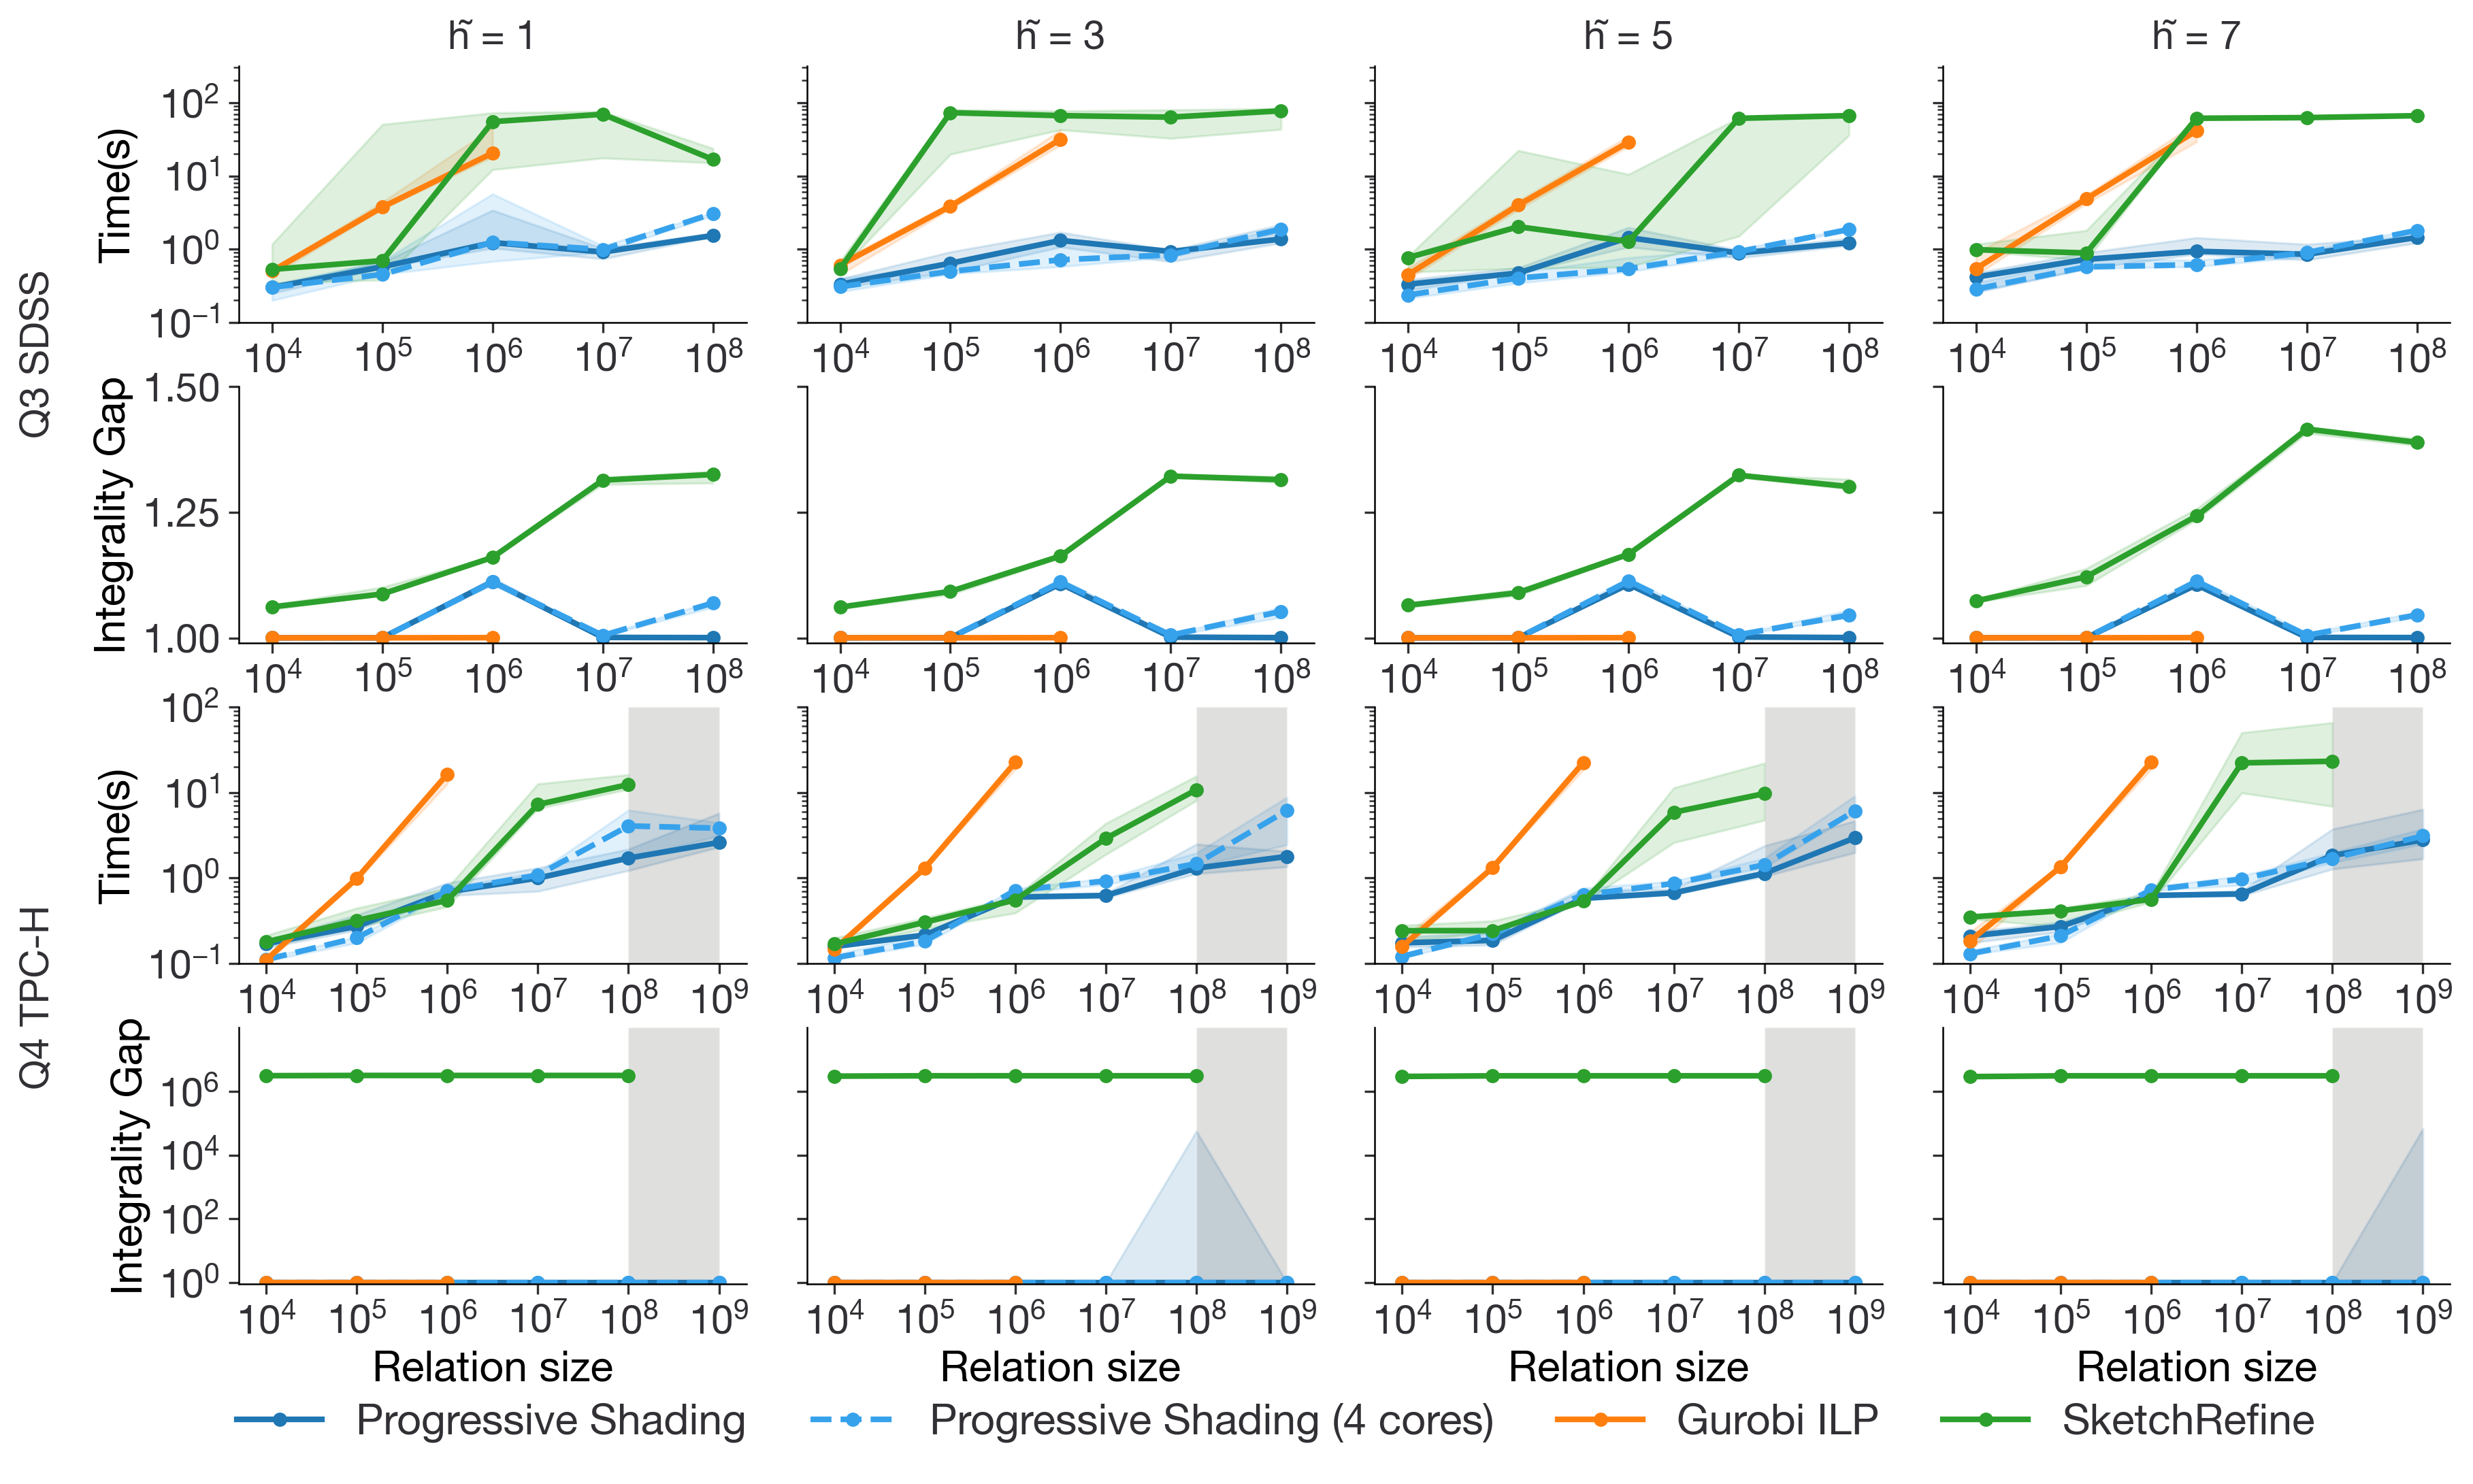

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
import matplotlib.ticker as ticker
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#37a2ec', '#FF7F0E', '#2CA02C', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance',
    'LSR4': 'Progressive Shading (4 cores)'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyles=['-','--','-','-']
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(12, 8)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
# xOffsetMap = [0.8, 1.2, 1, 1.6]
xOffsetMap = [1, 1, 1, 1]
d = 2
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('E1.csv', header=None)
data.columns = ["label", "size", "measurement_value"]

queries = {'ssds0':1, 'tpch0':2, 'ssds1':3, 'tpch1':4}
dataset_names = ['SDSS', 'TPC-H']
# Split label into dataset, Q value, and measurement type
data['query'] = data['label'].apply(lambda x: int(queries[x.split('_')[0]]))
data['hardness'] = data['label'].apply(lambda x: int(x.split('_')[1][1]))
data['method'] = data['label'].apply(lambda x: x.split('_')[2])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[3])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['time', 'igap', 'found', 'nofound'])]
filtered_data.loc[filtered_data['measurement_type'] == 'time', 'measurement_value'] /= 1000

# print(filtered_data[(filtered_data['size']==100000000) & (filtered_data['measurement_type']=='igap') & (filtered_data['hardness']==5) & ((filtered_data['method']=='LSR') | (filtered_data['method']=='LSR4'))])

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['query', 'method', 'measurement_type', 'hardness', 'size'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
median_values = grouped_data['measurement_value'].median().reset_index()
Q1_values = grouped_data['measurement_value'].quantile(0.25).reset_index()
Q3_values = grouped_data['measurement_value'].quantile(0.75).reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, median_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, Q1_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, Q3_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['query', 'method', 'measurement_type', 'hardness', 'size'])
aggregated_data.columns = ['query', 'method', 'measurement_type', 'hardness', 'size', 'sum', 'mean', 'median', 'Q1', 'Q3', 'min', 'max']
mid = 'median'
ypos = 'Q3'
yneg = 'Q1'

# fig, axs = plt.subplots(nrows=4, ncols=4, figsize=figsize)
fig = plt.figure(figsize=figsize)
gs_main = GridSpec(4, 4, fig)
axs = [[None for i in range(4)] for j in range(4)]

xticks = [[10**i for i in range(4,9)], [10**i for i in range(4,10)]]
methods = ["LSR", "LSR4", "GDR", "SR"]
qs = [3, 4]
error_alpha = 0.15
band_color = '#292928'
band_alpha = 0.15
broken = [True, False, False, False]
broken_lims = [((10, 10**5), (0.9, 5)), None, None, ((10**6, 10**8), (0.9, 10**4))]
time_ylims = [(0.1, 100), (0.1, 1000), (0.1, 10**2.5), (0.1, 100)]
d = 0.15
hs = [1,3,5,7]
xoffset = [0.001*x-10 for x in xticks[1]]
min_scale = 0.5
max_scale = 2
for qi, q in enumerate(qs):
    q_data = aggregated_data[aggregated_data['query']==q]
    for hi, h in enumerate(hs):
        max_other = 0
        h_data = q_data[q_data['hardness']==h]
        ax = fig.add_subplot(gs_main[qi*2, hi])
        axs[qi*2][hi] = ax
        for i, method in enumerate(methods):
            time_data = h_data[(h_data['measurement_type']=='time') & (h_data['method']==method)]
            ax.plot(time_data['size']*xOffsetMap[i], time_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
            ax.fill_between(time_data['size']*xOffsetMap[i], time_data[yneg], time_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
            ax.set_xscale('log')
            ax.set_xticks(xticks[qi])
            ax.set_yscale('log')
            ax.set_ylim(time_ylims[q-1][0], time_ylims[q-1][1])
            ax.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
            
            if method == 'LSR' or method == 'LSR4':
                max_lsr = time_data['size'].max()
            else:
                if not np.isnan(time_data['size'].max()):
                    max_other = max(time_data['size'].max(), max_other)
            if hi > 0:
                ax.set_yticklabels([])
        ax.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)

        if broken[q-1]:
            gs_nested = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs_main[qi*2+1, hi], hspace=0.1, height_ratios=[1, 3])
            ax1 = fig.add_subplot(gs_nested[0])
            ax2 = fig.add_subplot(gs_nested[1])
            axs[qi*2+1][hi] = [ax1, ax2]
            for i, method in enumerate(methods):
                igap_data = h_data[(h_data['measurement_type']=='igap') & (h_data['method']==method)]
                ax1.plot(igap_data['size']*xOffsetMap[i], igap_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
                ax1.fill_between(igap_data['size']*xOffsetMap[i], igap_data[yneg], igap_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
                ax2.plot(igap_data['size']*xOffsetMap[i], igap_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
                ax2.fill_between(igap_data['size']*xOffsetMap[i], igap_data[yneg], igap_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
                ax1.set_ylim(*broken_lims[q-1][0])  # outliers only
                ax2.set_ylim(*broken_lims[q-1][1])
                ax1.spines['bottom'].set_visible(False)
                ax2.spines['top'].set_visible(False)
                ax1.xaxis.tick_top()
                ax1.tick_params(labeltop=False)  # don't put tick labels at the top
                ax2.xaxis.tick_bottom()
                d = .015  # how big to make the diagonal lines in axes coordinates
                # arguments to pass to plot, just so we don't keep repeating them
                kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, linewidth=1.5)
                ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
                kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
                ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
                ax1.set_xscale('log')
                ax1.set_xticks(xticks[qi])
                ax2.set_xscale('log')
                ax2.set_xticks(xticks[qi])
                ax1.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
                ax2.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
                if q == 1:
                    ax1.set_yscale('log')
                    ax1.set_yticks([1e2,1e5])
                    ax2.set_yscale('log')
                    ticks = [1, 2, 3, 4]
                    ax2.set_yticks(ticks)
                    ax2.set_yticklabels([str(t) for t in ticks])
                elif q == 4:
                    ax1.set_yscale('log')
                    ax1.set_yticks([1e7])
                    ax2.set_yscale('log')
                    ax2.set_yticks([1e0, 1e2, 1e4])
                    from matplotlib.ticker import LogLocator, LogFormatter
                    # Setting minor ticks using LogLocator
                    minor_locator = LogLocator(subs=np.arange(2, 10)*.1, numticks=12)
                    ax2.yaxis.set_minor_locator(minor_locator)
                    # Formatting the minor ticks
                    minor_formatter = LogFormatter(labelOnlyBase=False)
                    ax2.yaxis.set_minor_formatter(minor_formatter)
                if hi > 0:
                    ax1.set_yticklabels([])
                    ax2.set_yticklabels([])
            ax1.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)
            ax2.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)
        else:
            axx = fig.add_subplot(gs_main[qi*2+1, hi])
            axs[qi*2+1][hi] = [axx]
            for i, method in enumerate(methods):
                igap_data = h_data[(h_data['measurement_type']=='igap') & (h_data['method']==method)]
                axx.plot(igap_data['size']*xOffsetMap[i], igap_data[mid], color=colorWheel[i], linestyle=linestyles[i], linewidth=lw, marker=marker, markersize=markersize, markeredgecolor=colorWheel[i], label=curve_names[method])
                axx.fill_between(igap_data['size']*xOffsetMap[i], igap_data[yneg], igap_data[ypos], color=colorWheel[i], alpha=error_alpha) # `alpha` controls the transparency of the shaded region
                axx.set_xscale('log')
                axx.set_xticks(xticks[qi])
                if q == 1:
                    axx.set_ylim(0.9, 10**5)
                    axx.set_yscale('log')
                    axx.set_yticks([1,1e2,1e4,1e6])
                elif q == 2:
                    axx.set_ylim(0.99, 1.3)
                elif q == 3:
                    axx.set_ylim(0.99, 1.5)
                elif q == 4:
                    axx.set_ylim(0.9, 10**8)
                    axx.set_yscale('log')
                    axx.set_yticks([1,1e2,1e4,1e6])
                if hi > 0:
                    axx.set_yticklabels([])
                axx.set_xlim(min(xticks[qi])*min_scale, max(xticks[qi])*max_scale)
            axx.axvspan(max_other, max_lsr, facecolor=band_color, edgecolor='white', alpha=band_alpha)

xmove = 0.5
ymove = -1.25
axs[0][0].set_ylabel('Time(s)')
axs[1][0][0].set_ylabel('Integrality Gap')
if len(axs[1][0]) > 1:
    axs[1][0][0].yaxis.label.set_position((xmove,ymove))
else:
    axs[1][0][0].yaxis.label.set_position((xmove,0.5))

axs[2][0].set_ylabel('Time(s)')
axs[3][0][0].set_ylabel('Integrality Gap')
if len(axs[3][0]) > 1:
    axs[3][0][0].yaxis.label.set_position((xmove,ymove))
else:
    axs[3][0][0].yaxis.label.set_position((xmove,0.5))

for i in range(4):
    axs[-1][i][-1].set_xlabel('Relation size')
    axs[0][i].set_title('h̃ = '+str(hs[i]), loc='center')

# # Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, 0.09, 0.7, 0.05])
ax_leg.axis('off')
ax_leg.legend(axs[-1][-1][-1].get_legend_handles_labels()[0], [curve_names[method] for method in methods], loc='center', ncol=len(methods), frameon=False)

# Determine the vertical center between the first two rows
center_first_two = (axs[0][0].get_position().get_points()[0][1] + axs[1][0][0].get_position().get_points()[1][1]) / 2
# Determine the vertical center between the last two rows
center_last_two = (axs[2][0].get_position().get_points()[0][1] + axs[3][0][0].get_position().get_points()[1][1]) / 2
# Adding the left horizontal titles
titles = [f'Q{q} {dataset_names[qi]}' for qi, q in enumerate(qs)]
hspace = -0.005
fs = 14
fig.text(hspace, center_first_two+0.07, titles[0], va='center', ha='center', rotation='vertical', fontsize=fs, fontweight='bold')
fig.text(hspace, center_last_two+0.07, titles[1], va='center', ha='center', rotation='vertical', fontsize=fs, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(bottom=0.2, hspace=0.25)
plt.show()

/tmp/ipykernel_3459623/3764116230.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


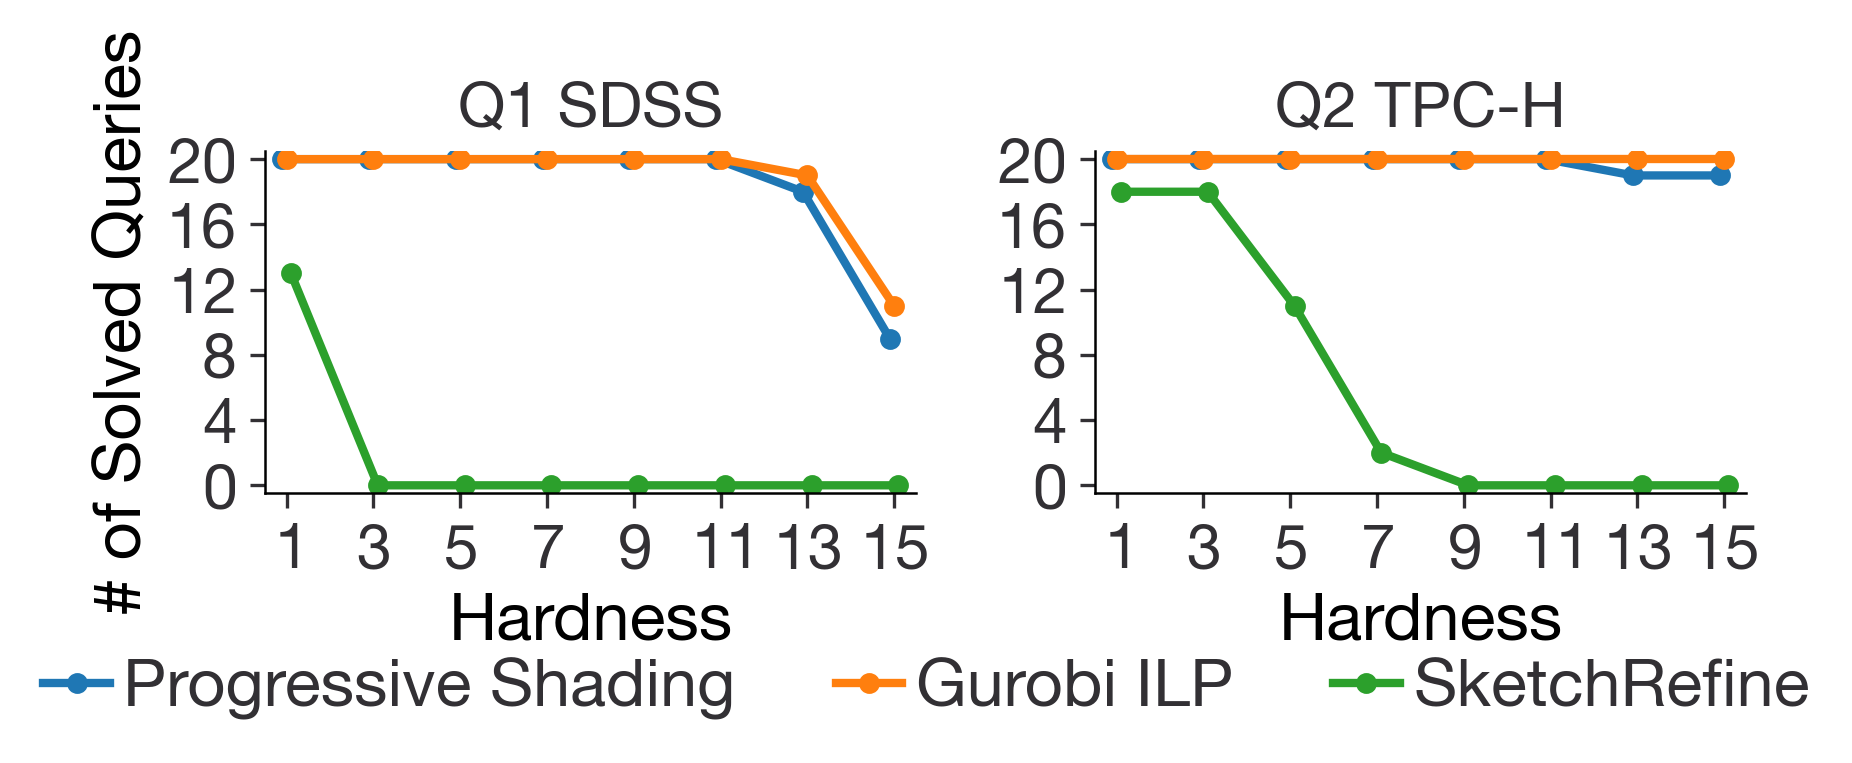

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 2)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 3
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('E2.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

queries = {'ssds0':1, 'tpch0':2, 'ssds1':3, 'tpch1':4}

# Split label into dataset, Q value, and measurement type
data['query'] = data['label'].apply(lambda x: int(queries[x.split('_')[0]]))
data['method'] = data['label'].apply(lambda x: x.split('_')[2])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[3])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['found', 'nofound'])]

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['query', 'method', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['query', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['query', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['query', 'method', 'measurement_type', 'hardness'])
aggregated_data.columns = ['query', 'method', 'measurement_type', 'hardness', 'sum', 'mean', 'min', 'max']
aggregated_data['ypos'] = aggregated_data['max']-aggregated_data['mean']
aggregated_data['yneg'] = aggregated_data['mean']-aggregated_data['min']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
xticks = [1,3,5,7,9,11,13,15]
methods = ["LSR", "GDR", "SR"]
qs = [1, 2]
xoffset = [-0.1, 0, 0.1]
N = 20
for qi, q in enumerate(qs):
    q_data = aggregated_data[(aggregated_data['query']==q) & (aggregated_data['measurement_type']=='found')]
    ax = axs[qi]
    for i, method in enumerate(methods):
        data = q_data[q_data['method']==method]
        desired_x_values = pd.DataFrame({'hardness': [1,3,5,7,9,11,13,15]})
        data = pd.merge(desired_x_values, data, on='hardness', how='left')
        # Fill missing y-values with 0
        data.fillna(0, inplace=True)
        ax.plot(
            data['hardness']+xoffset[i],
            data['sum'],
            color = colorWheel[i],
            linestyle=linestyle,
            lw=lw,
            marker=marker,
            markersize=markersize,
            markeredgecolor=colorWheel[i],
            label = curve_names[method]
        )
        ax.set_xticks(xticks)
        ax.set_xlim(min(xticks)-0.5, max(xticks)+0.5)
        ax.set_ylim(-0.5, 20.5)
        ax.set_yticks([i for i in range(0, 22, 4)])
        ax.set_title(f'Q{q} {dataset_names[qi]}', fontweight='bold', loc='center')
        ax.set_xlabel("Hardness")

# # Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -.15, 0.7, 0.05])
ax_leg.axis('off')
ax_leg.legend(axs[-1].get_legend_handles_labels()[0], [curve_names[method] for method in methods], handlelength=1, handletextpad=0.2, loc='center', ncol=len(methods), frameon=False)
axs[0].set_ylabel("# of Solved Queries")
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, hspace=0.25)
plt.show()

/tmp/ipykernel_3459623/4208397390.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


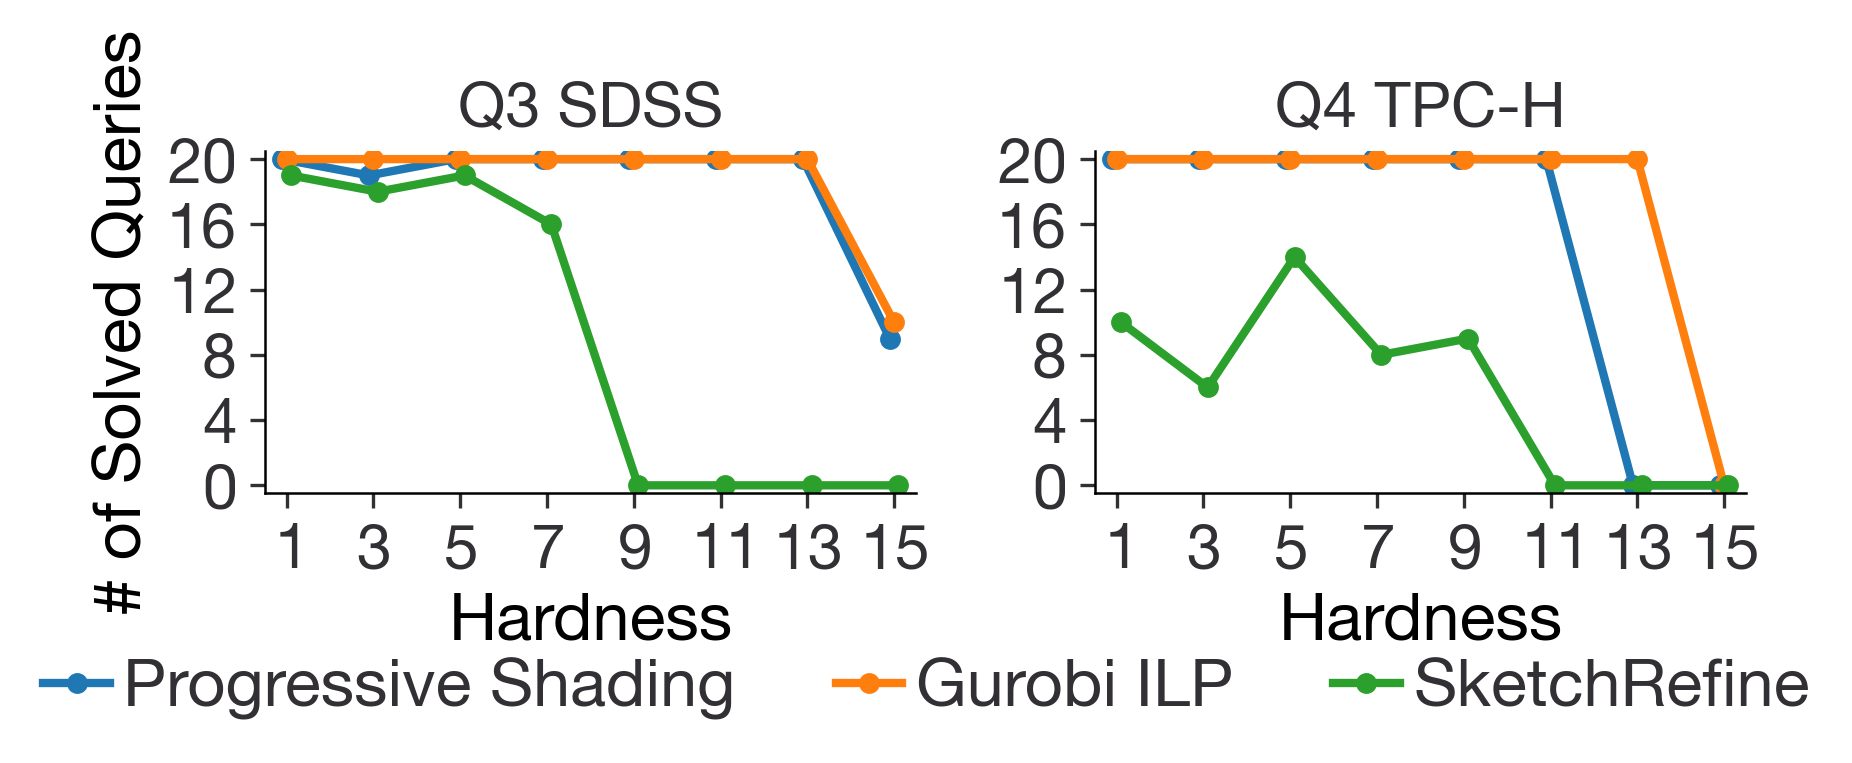

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import *
from pathlib import Path
plt.style.use('plot_styles.txt')
import  matplotlib.font_manager
fpath = '/usr/local/share/fonts/HelveticaNeue.ttf'

colorWheel = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']

curve_names = {
    'D': 'Parallel Dual Simplex',
    'DR': 'Dual Reducer',
    'GDR': 'Gurobi ILP',
    'SR': 'SketchRefine',
    'LSR': 'Progressive Shading',
    'DLV': 'Dynamic Low Variance'
}

lw=2
markersize=4
capsize=2
marker='o'
linestyle='-'
capsize=4
capthick=0.8
elinewidth=0.5
alpha=0.15
figsize=(6, 2)

plt.rcParams["font.family"] = "Helvetica Neue"

indexMap = {'GDR': 1, 'SR': 2, 'LSR': 0}
xOffsetMap = [0.8, 1.4, 1]

d = 3
SMALL_SIZE = 12+d
MEDIUM_SIZE = 13+d
BIGGER_SIZE = 16+d

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#markers = ['o', 'P', 'd', 'v', '^']

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('E2.csv', header=None)
data.columns = ["label", "hardness", "measurement_value"]

queries = {'ssds0':1, 'tpch0':2, 'ssds1':3, 'tpch1':4}

# Split label into dataset, Q value, and measurement type
data['query'] = data['label'].apply(lambda x: int(queries[x.split('_')[0]]))
data['method'] = data['label'].apply(lambda x: x.split('_')[2])
data['measurement_type'] = data['label'].apply(lambda x: x.split('_')[3])

# Filter for 'time' and 'igap' measurement types
filtered_data = data[data['measurement_type'].isin(['found', 'nofound'])]

# Group by dataset, Q value, measurement type, and hardness to compute mean and std
grouped_data = filtered_data.groupby(['query', 'method', 'measurement_type', 'hardness'])
sum_values = grouped_data['measurement_value'].sum().reset_index()
mean_values = grouped_data['measurement_value'].mean().reset_index()
min_values = grouped_data['measurement_value'].min().reset_index()
max_values = grouped_data['measurement_value'].max().reset_index()

# # Merge mean and std dataframes
aggregated_data = pd.merge(sum_values, mean_values, on=['query', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, min_values, on=['query', 'method', 'measurement_type', 'hardness'])
aggregated_data = pd.merge(aggregated_data, max_values, on=['query', 'method', 'measurement_type', 'hardness'])
aggregated_data.columns = ['query', 'method', 'measurement_type', 'hardness', 'sum', 'mean', 'min', 'max']
aggregated_data['ypos'] = aggregated_data['max']-aggregated_data['mean']
aggregated_data['yneg'] = aggregated_data['mean']-aggregated_data['min']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
xticks = [1,3,5,7,9,11,13,15]
methods = ["LSR", "GDR", "SR"]
qs = [3, 4]
xoffset = [-0.1, 0, 0.1]
N = 20
for qi, q in enumerate(qs):
    q_data = aggregated_data[(aggregated_data['query']==q) & (aggregated_data['measurement_type']=='found')]
    ax = axs[qi]
    for i, method in enumerate(methods):
        data = q_data[q_data['method']==method]
        desired_x_values = pd.DataFrame({'hardness': [1,3,5,7,9,11,13,15]})
        data = pd.merge(desired_x_values, data, on='hardness', how='left')
        # Fill missing y-values with 0
        data.fillna(0, inplace=True)
        ax.plot(
            data['hardness']+xoffset[i],
            data['sum'],
            color = colorWheel[i],
            linestyle=linestyle,
            lw=lw,
            marker=marker,
            markersize=markersize,
            markeredgecolor=colorWheel[i],
            label = curve_names[method]
        )
        ax.set_xticks(xticks)
        ax.set_xlim(min(xticks)-0.5, max(xticks)+0.5)
        ax.set_ylim(-0.5, 20.5)
        ax.set_yticks([i for i in range(0, 22, 4)])
        ax.set_title(f'Q{q} {dataset_names[qi]}', fontweight='bold', loc='center')
        ax.set_xlabel("Hardness")

# # Create a separate axis for the legend at the bottom
ax_leg = fig.add_axes([0.15, -.15, 0.7, 0.05])
ax_leg.axis('off')
ax_leg.legend(axs[-1].get_legend_handles_labels()[0], [curve_names[method] for method in methods], handlelength=1, handletextpad=0.2, loc='center', ncol=len(methods), frameon=False)
axs[0].set_ylabel("# of Solved Queries")
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, hspace=0.25)
plt.show()

In [16]:
import numpy as np
from scipy.stats import norm

def calculate_bounds(attributes, hardness, E):
    bounds = []
    for h in hardness:
        bounds_for_h = []
        for attr in attributes:
            mu, sigma = attr['mean'], attr['stddev']
            p = 10 ** (-h / len(attributes))

            if attr['constraint_type'] == 'lower_bound':
                lower_bound = norm.ppf(1 - p, loc=mu, scale=sigma / np.sqrt(E))
                bounds_for_h.append(lower_bound)
            elif attr['constraint_type'] == 'upper_bound':
                upper_bound = norm.ppf(p, loc=mu, scale=sigma / np.sqrt(E))
                bounds_for_h.append(upper_bound)
            elif attr['constraint_type'] == 'double_bound':
                lower_bound = norm.ppf((1-p)/2, loc=mu, scale=sigma / np.sqrt(E))
                upper_bound = norm.ppf(1-(1-p)/2, loc=mu, scale=sigma / np.sqrt(E))
                bounds_for_h.extend([lower_bound, upper_bound])
        bounds_for_h = np.array(bounds_for_h) * E
        bounds.append(bounds_for_h)
    return bounds

# attributes_sdss = [
#     {'mean': 14.82, 'stddev': 1.562, 'constraint_type': 'lower_bound'},
#     {'mean': 14.05, 'stddev': 1.657, 'constraint_type': 'upper_bound'},
#     {'mean': 13.73, 'stddev': 1.727, 'constraint_type': 'double_bound'}
# ]

# attributes_tpch = [
#     {'mean': 25.50, 'stddev': 14.43, 'constraint_type': 'lower_bound'},
#     {'mean': 1912, 'stddev': 1833, 'constraint_type': 'upper_bound'},
#     {'mean': 1530, 'stddev': 1485, 'constraint_type': 'double_bound'}
# ]

attributes_sdss = [
    {'mean': 14.45, 'stddev': 14.96, 'constraint_type': 'lower_bound'},
    {'mean': 14.82, 'stddev': 1.562, 'constraint_type': 'upper_bound'},
    {'mean': 14.05, 'stddev': 1.657, 'constraint_type': 'double_bound'}
]

attributes_tpch = [
    {'mean': 25.50, 'stddev': 14.43, 'constraint_type': 'upper_bound'},
    {'mean': 38240, 'stddev': 23290, 'constraint_type': 'double_bound'}
]

hardness = [1, 3, 5, 7]

bounds_sdss = calculate_bounds(attributes_sdss, hardness, 50)
bounds_tpch = calculate_bounds(attributes_tpch, hardness, 100)

for bound in bounds_sdss:
    print(bound)
print()
for bound in bounds_tpch:
    print(bound)

# print("Bounds for SDSS dataset:", bounds_sdss)
# print("Bounds for TPC-H dataset:", bounds_tpch)


[732.01641871 740.00637393 695.24598767 709.75401233]
[858.06659284 726.84525281 701.02765624 703.97234376]
[936.4834135  718.65761418 702.18358755 702.81641245]
[997.68917776 712.26701232 702.4318389  702.5681611 ]

[2.48098513e+03 3.72913494e+06 3.91886506e+06]
[2.28196834e+03 3.81476699e+06 3.83323301e+06]
[2.15599428e+03 3.82307694e+06 3.82492306e+06]
[2.05688362e+03 3.82390769e+06 3.82409231e+06]
